# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1:Netanel  7816
# student 2:Yakir  7303

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint, uniform
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings warnings.simplefilter(action = "ignore", category = FutureWarning)

In [3]:
pd.set_option('display.max_colwidth', None)
def highlight_first_row(row):
    color = 'background-color: beige'
    return [color if row.name == 0 else '' for _ in row]

In [4]:
def load_dataset(file_name):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_name)
    return df

In [5]:
df_train=load_dataset('./wine_train.csv')
df_train.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    12.08        1.83  2.32               18.5       81.0           1.60   
1    13.58        2.58  2.69               24.5      105.0           1.55   
2    12.37        0.94  1.36               10.6       88.0           1.98   
3    11.82        1.72  1.88               19.5       86.0           2.50   
4    13.16        3.57  2.15               21.0      102.0           1.50   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        1.50                  0.52             1.64             2.40  1.08   
1        0.84                  0.39             1.54             8.66  0.74   
2        0.57                  0.28             0.42             1.95  1.05   
3        1.64                  0.37             1.42             2.06  0.94   
4        0.55                  0.43             1.30             4.00  0.60   

   od280/od315_of_diluted_wines  proline  target  
0                          2.27    480.0       1  
1                          1.80    750.0       2  
2                          1.82    520.0       1  
3                          2.44    415.0       1  
4                          1.68    830.0       2

In [6]:
df_test=load_dataset('./wine_test.csv')
df_test.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    13.78        2.76  2.30               22.0       90.0           1.35   
1    14.02        1.68  2.21               16.0       96.0           2.65   
2    13.17        5.19  2.32               22.0       93.0           1.74   
3    11.03        1.51  2.20               21.5       85.0           2.46   
4    13.40        3.91  2.48               23.0      102.0           1.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        0.68                  0.41             1.03             9.58  0.70   
1        2.33                  0.26             1.98             4.70  1.04   
2        0.63                  0.61             1.55             7.90  0.60   
3        2.17                  0.52             2.01             1.90  1.71   
4        0.75                  0.43             1.41             7.30  0.70   

   od280/od315_of_diluted_wines  proline  target  
0                          1.68    615.0       2  
1                          3.59   1035.0       0  
2                          1.48    725.0       2  
3                          2.87    407.0       1  
4                          1.56    750.0       2

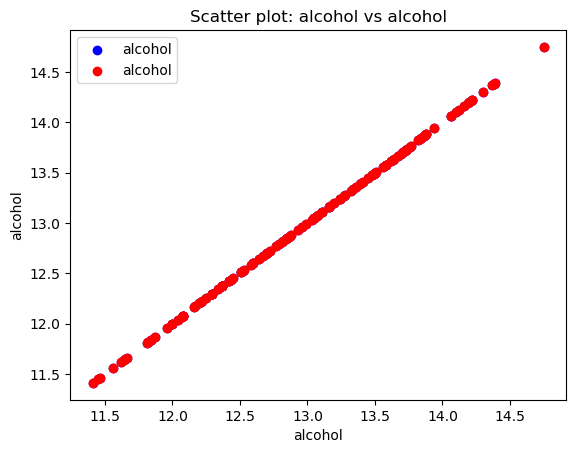

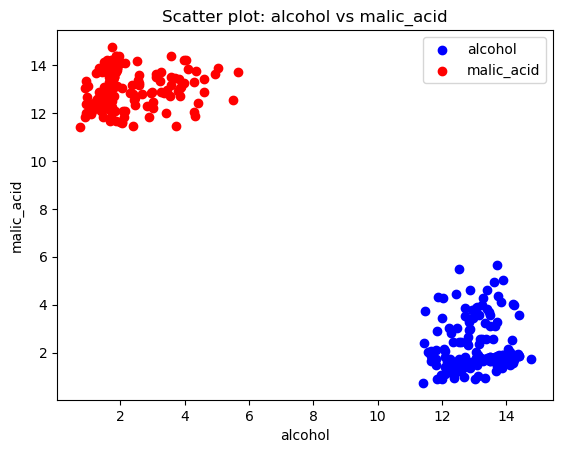

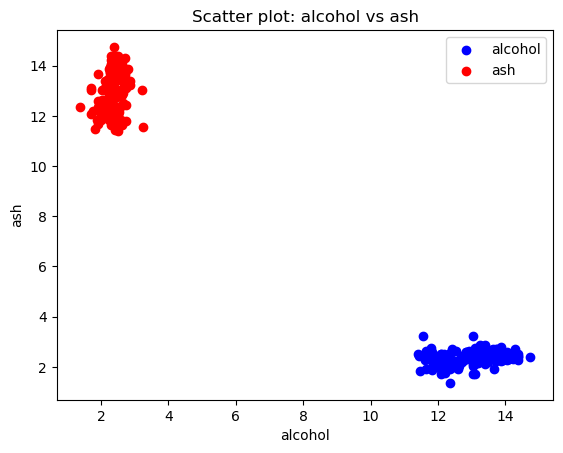

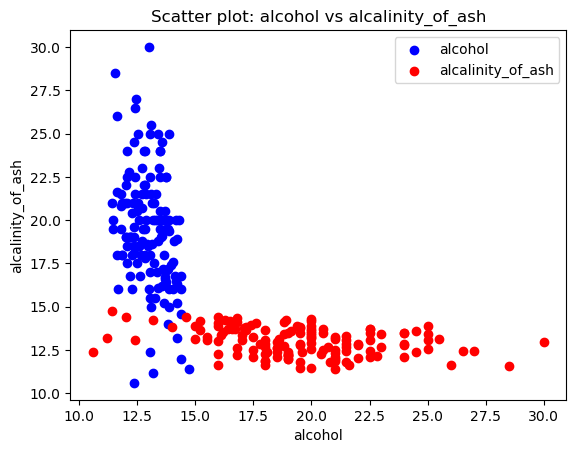

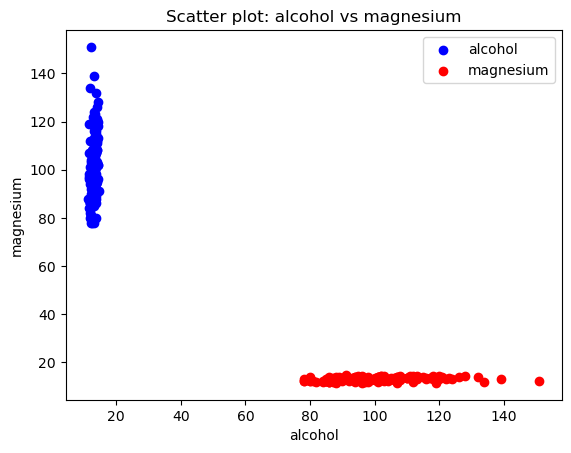

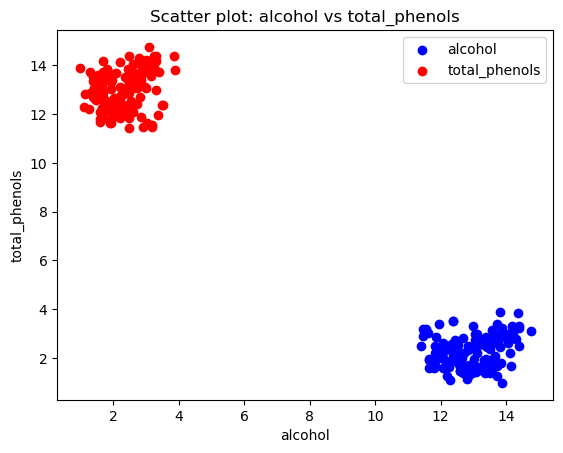

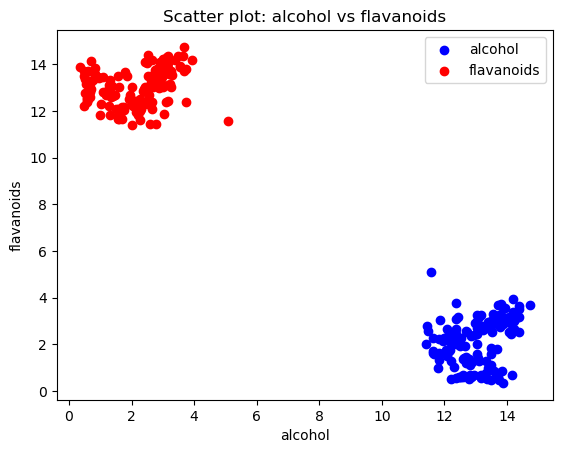

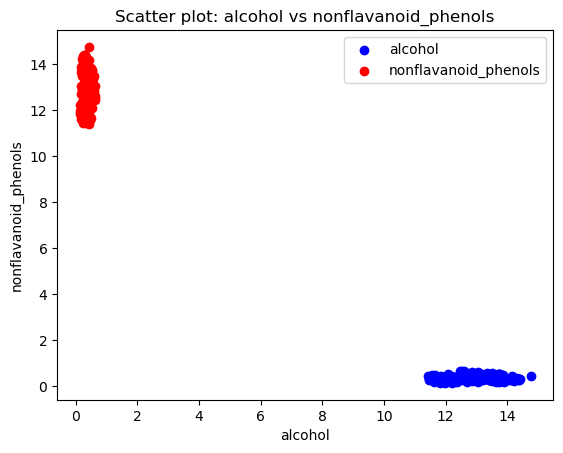

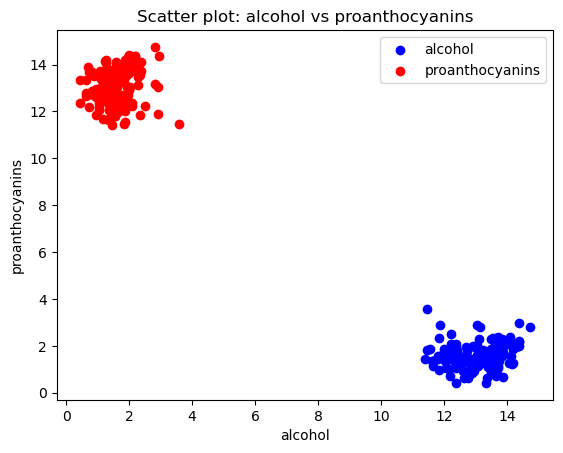

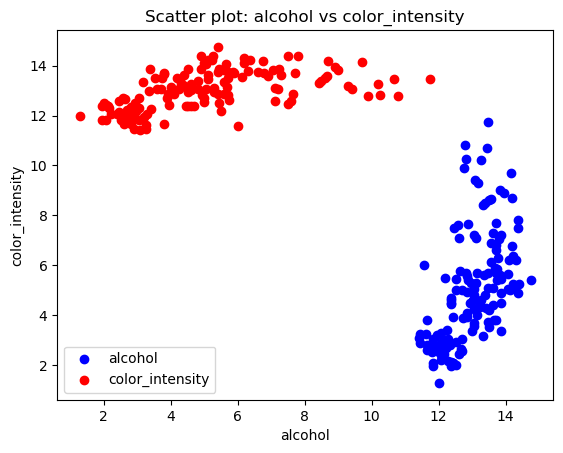

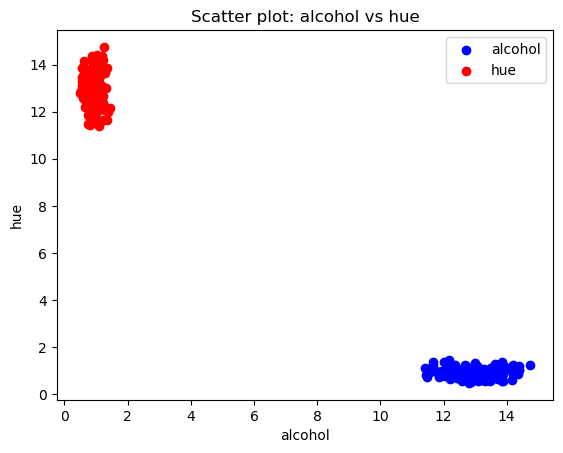

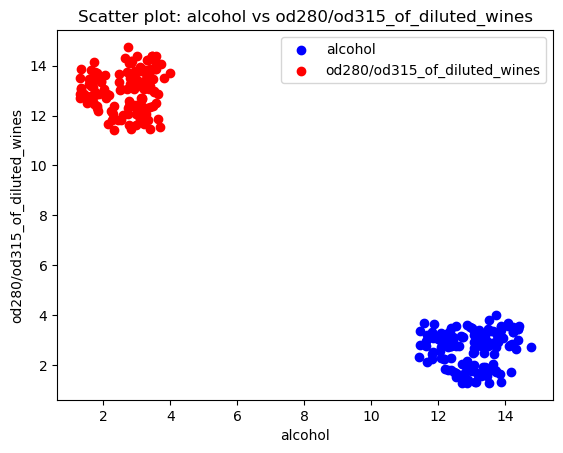

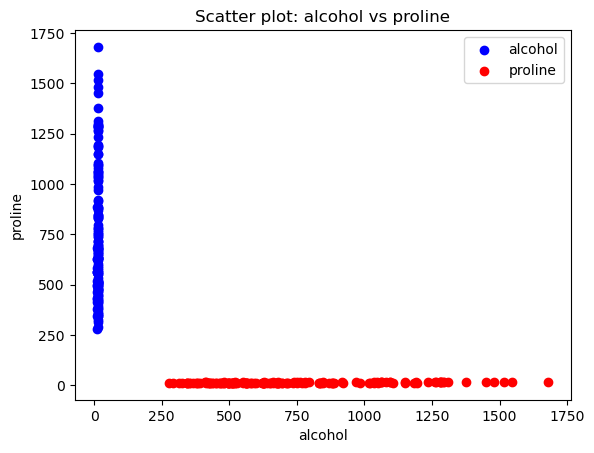

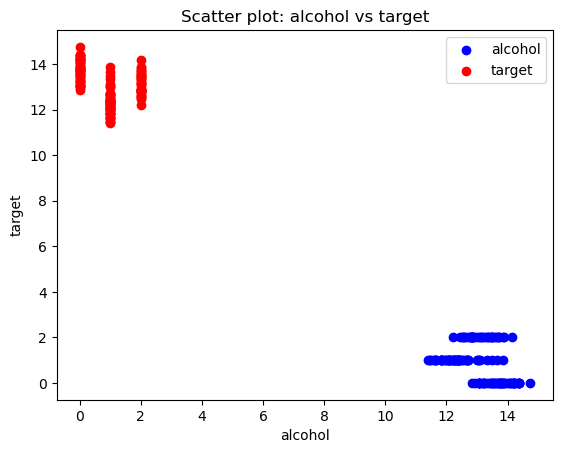

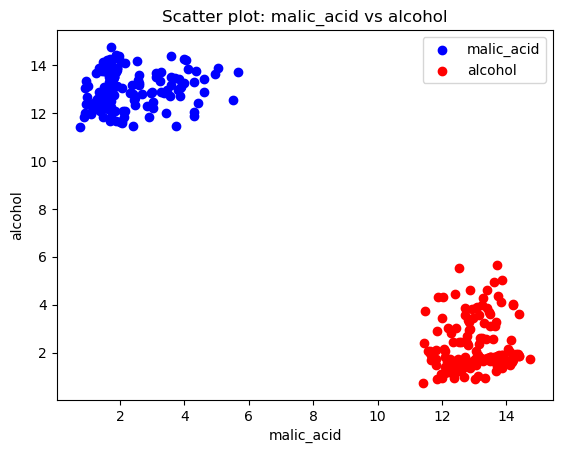

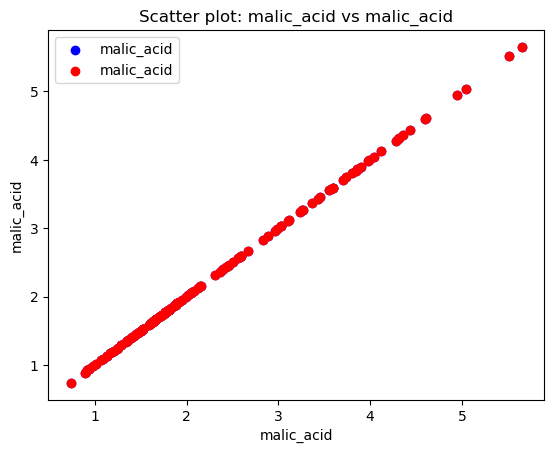

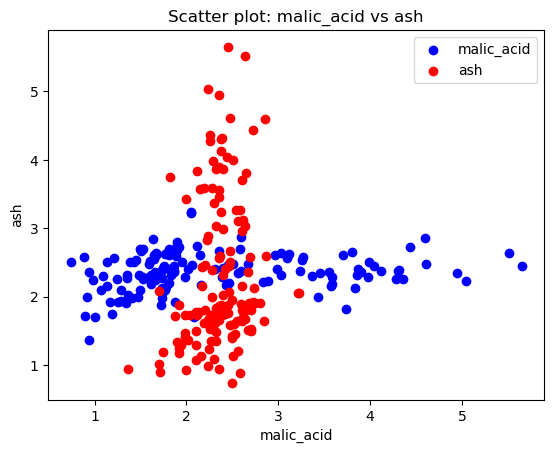

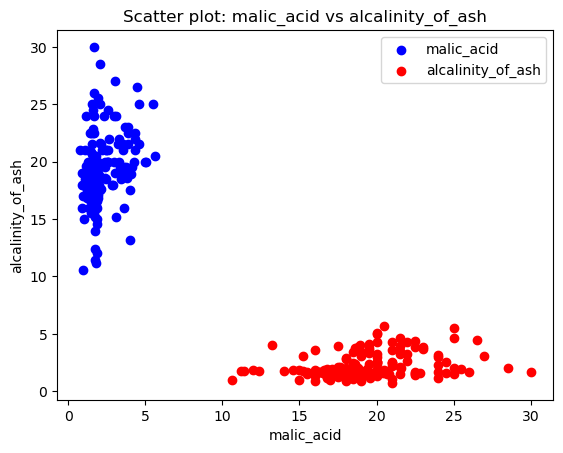

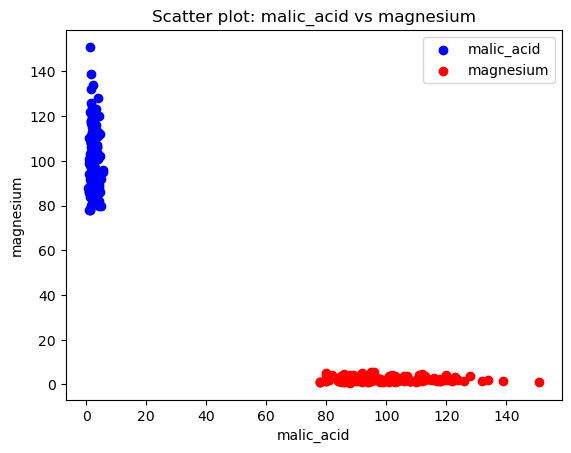

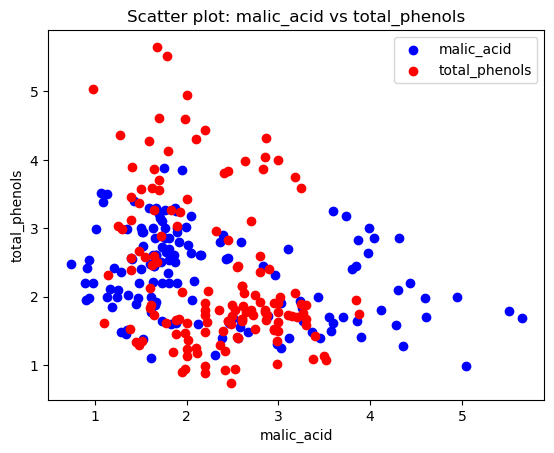

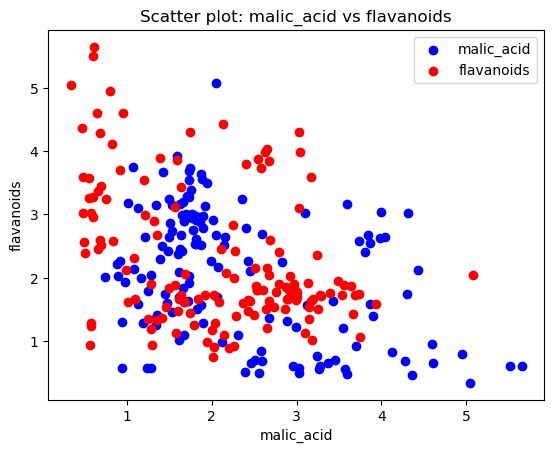

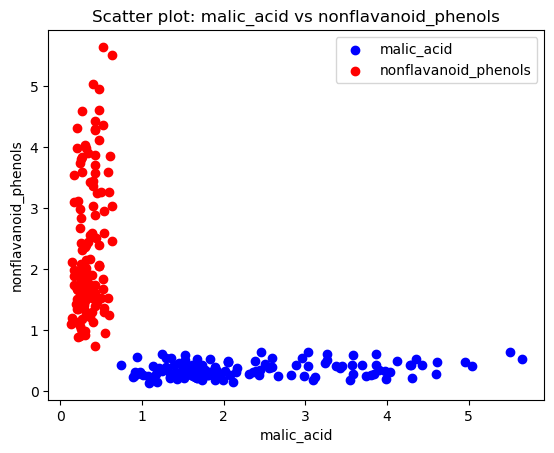

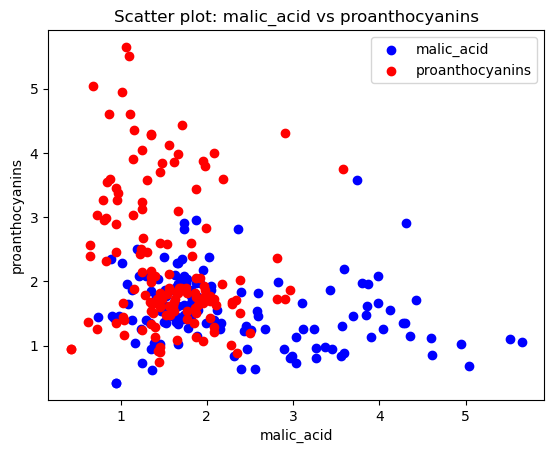

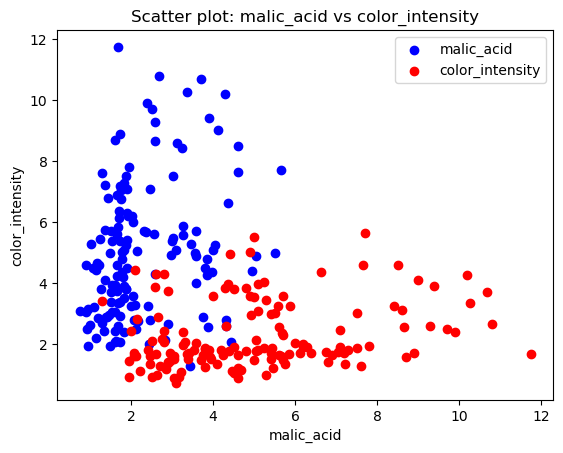

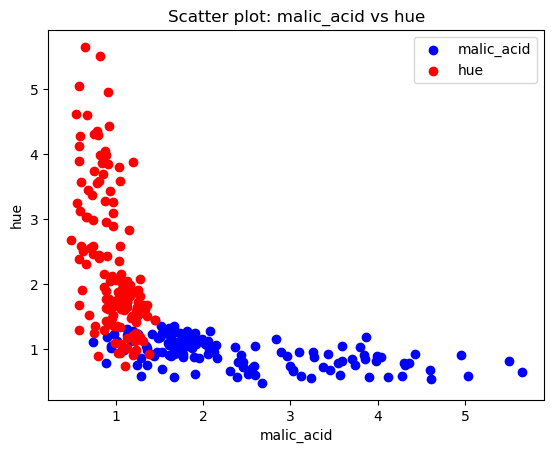

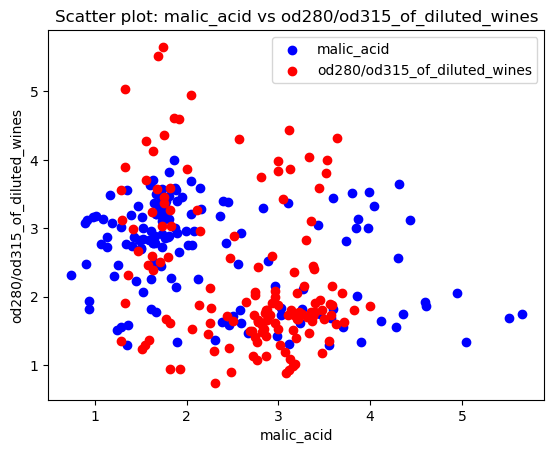

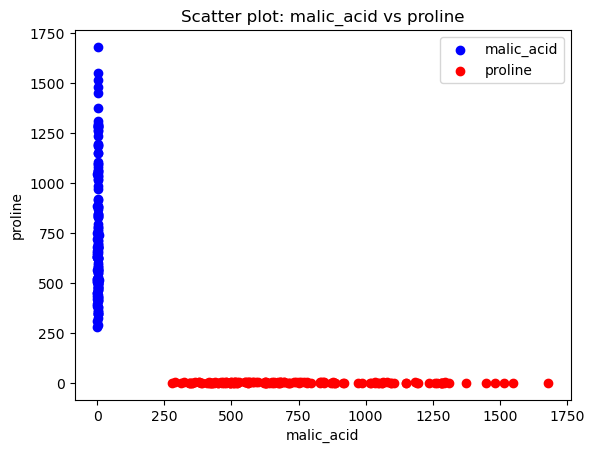

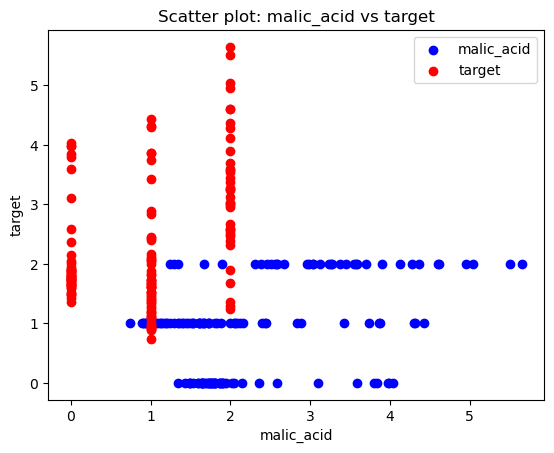

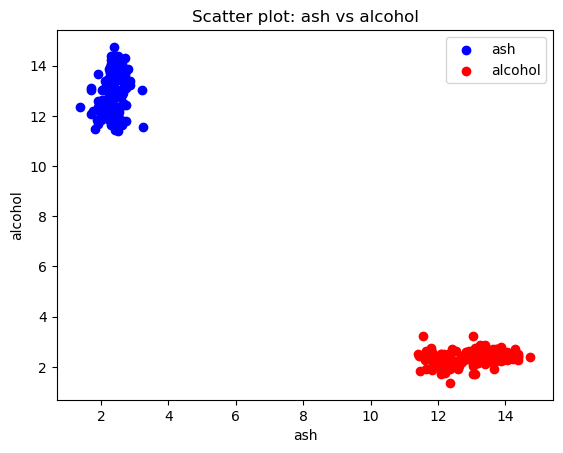

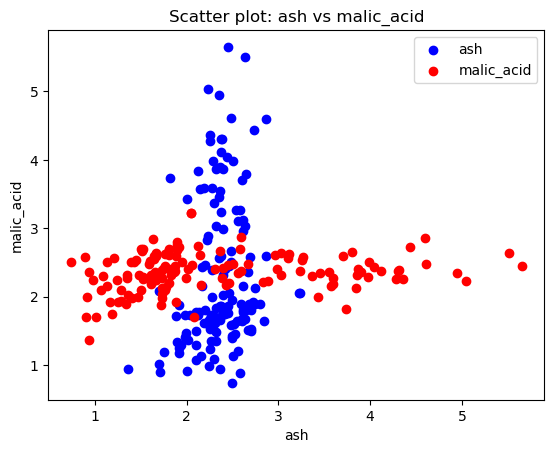

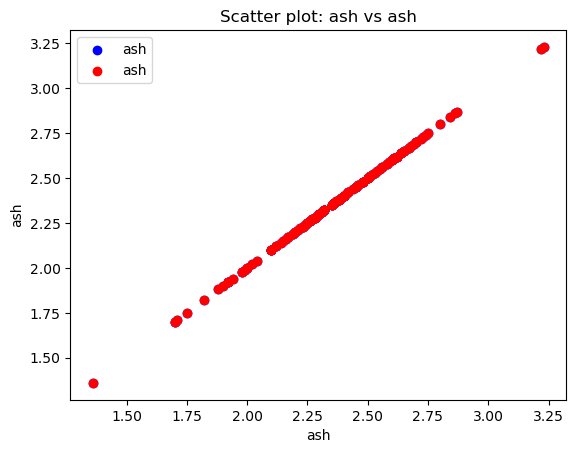

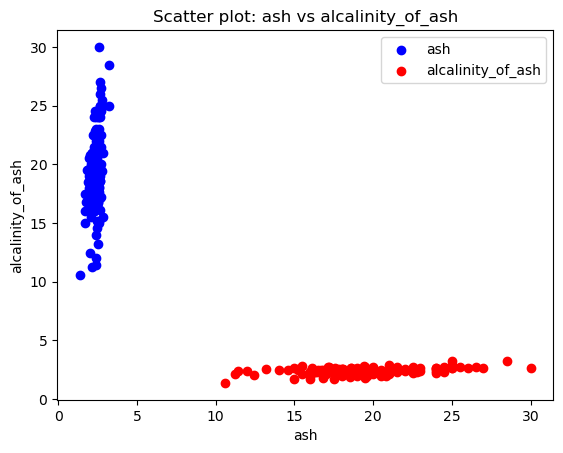

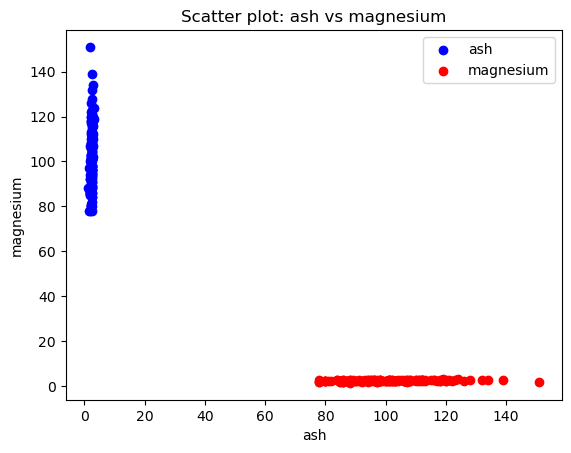

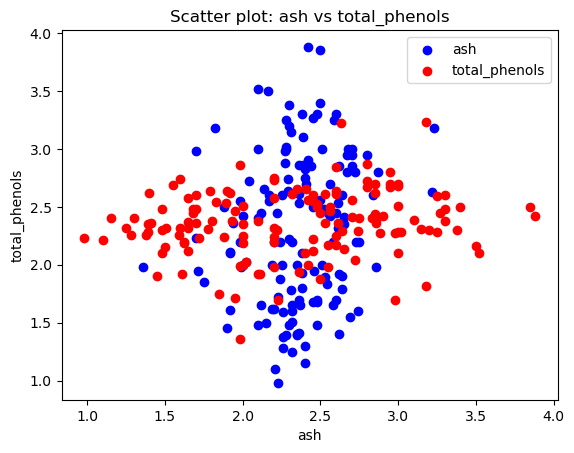

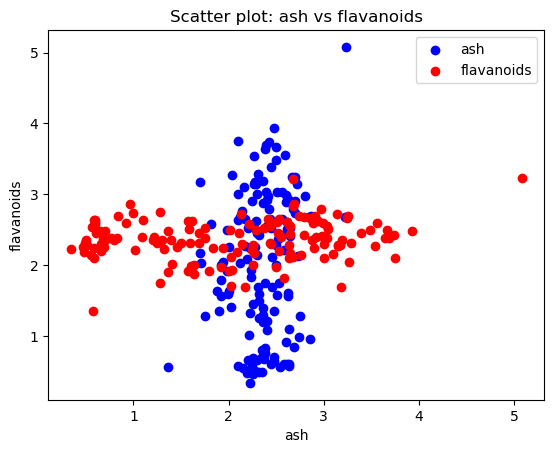

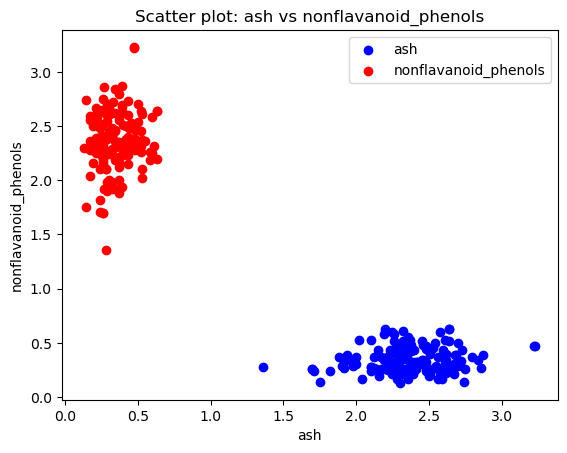

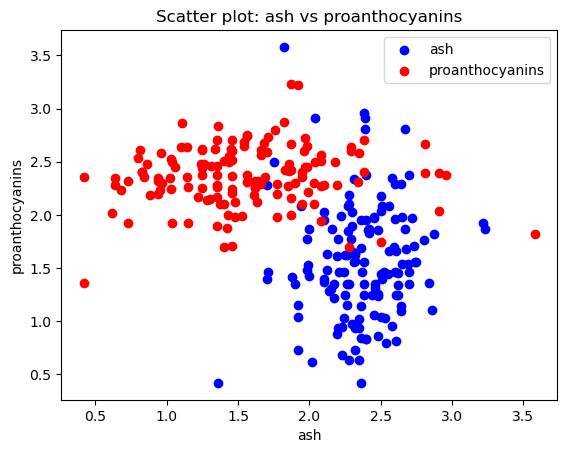

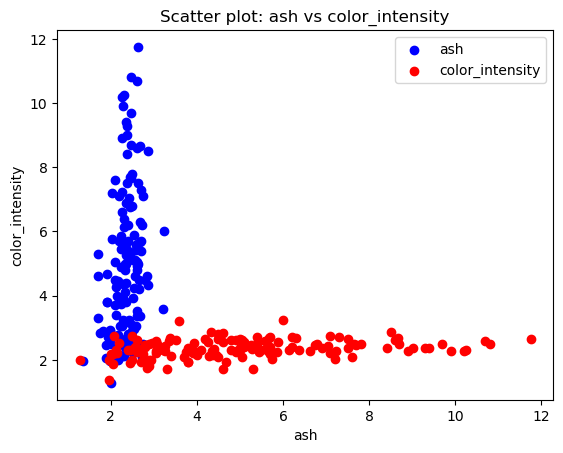

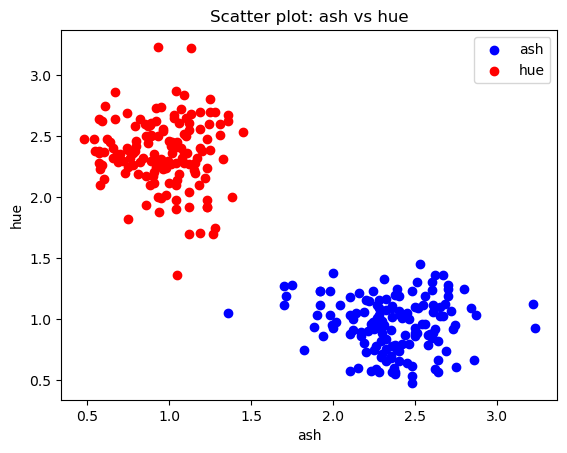

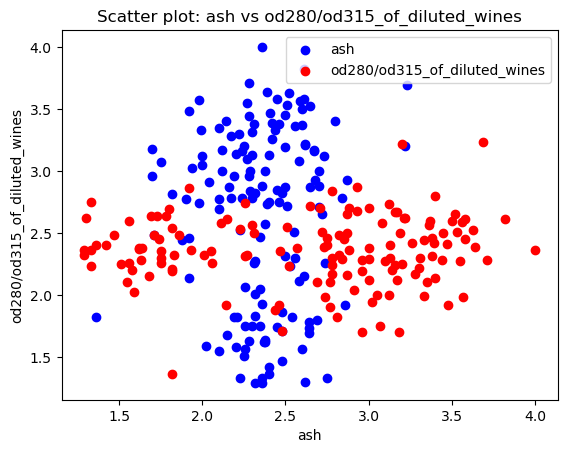

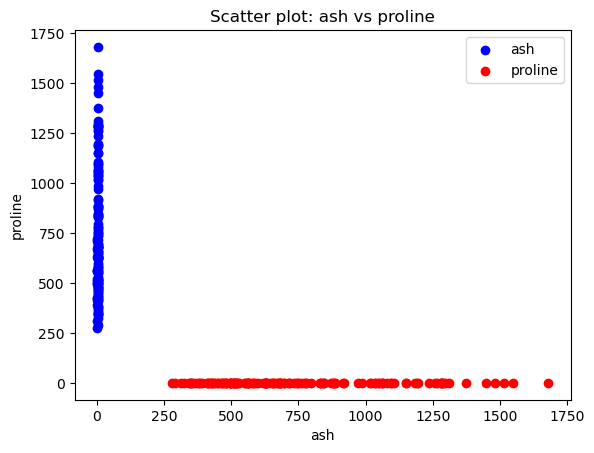

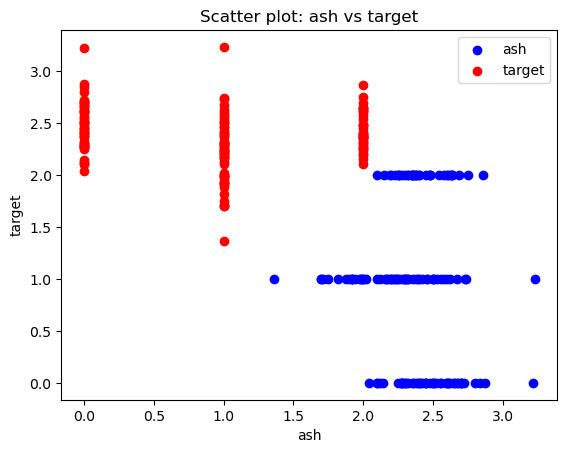

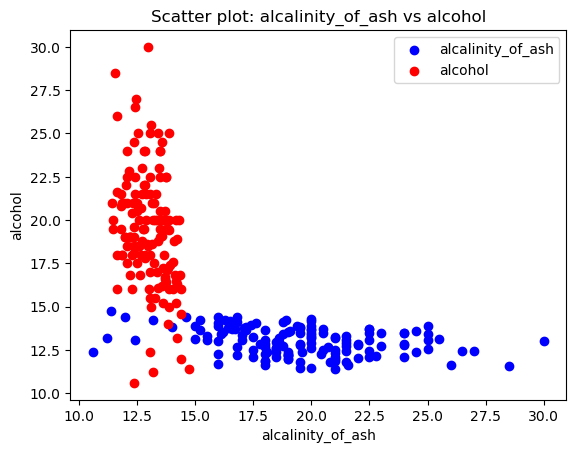

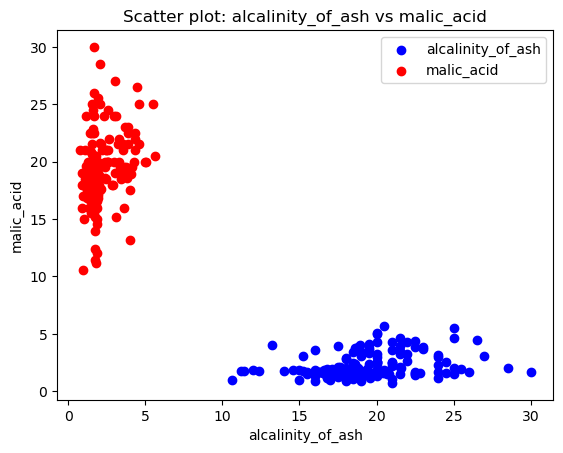

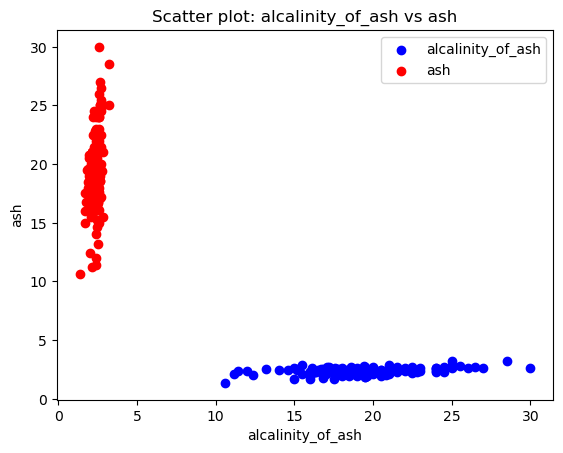

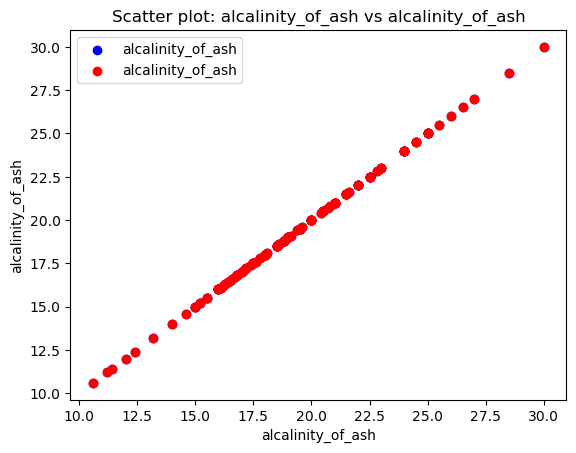

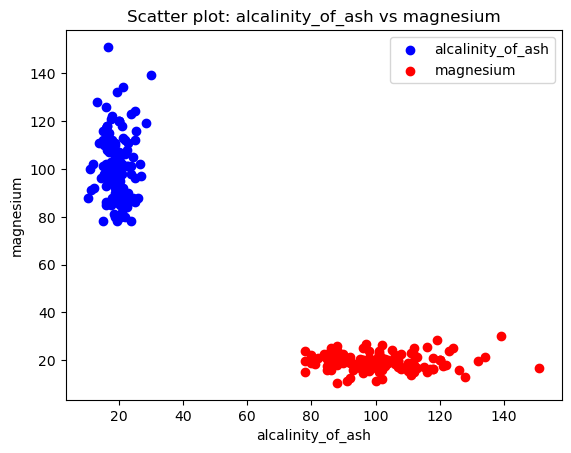

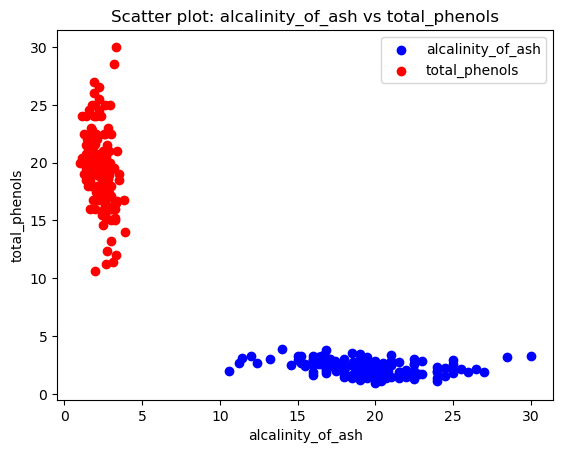

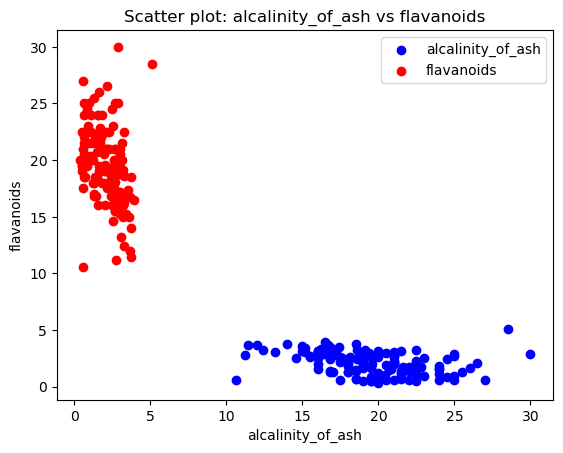

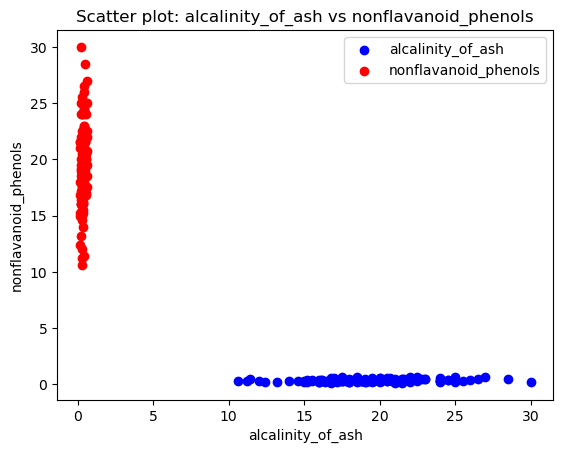

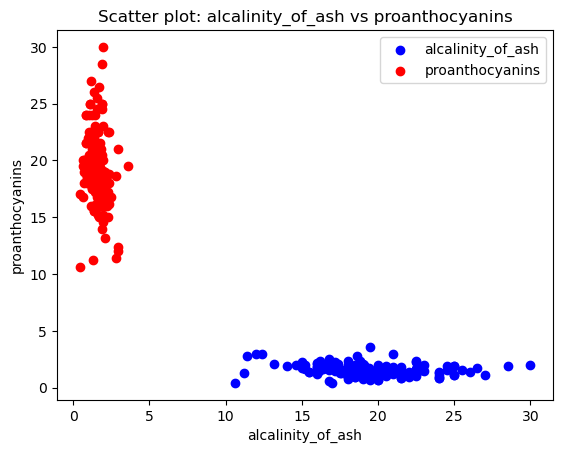

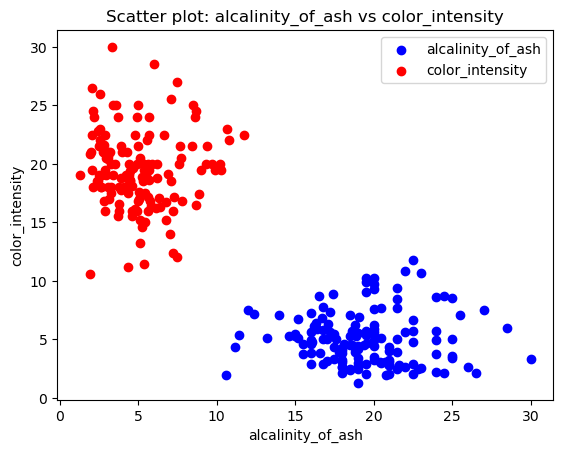

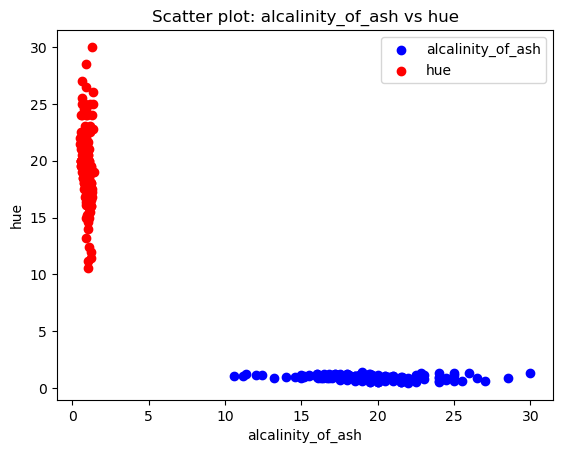

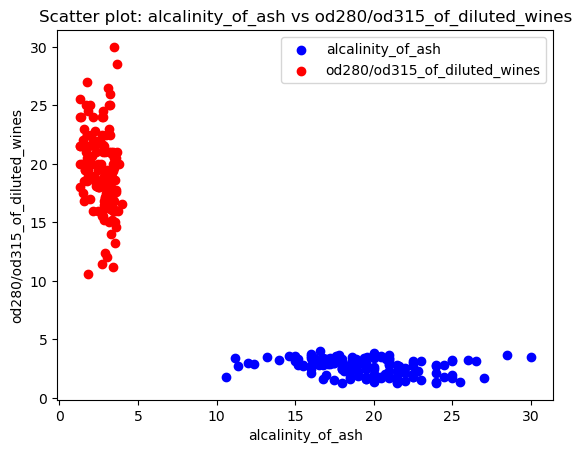

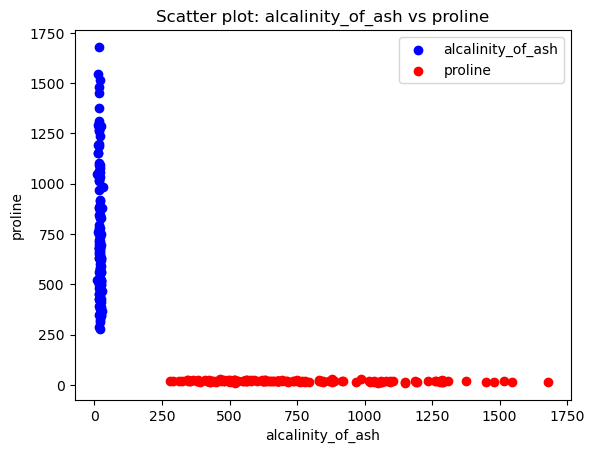

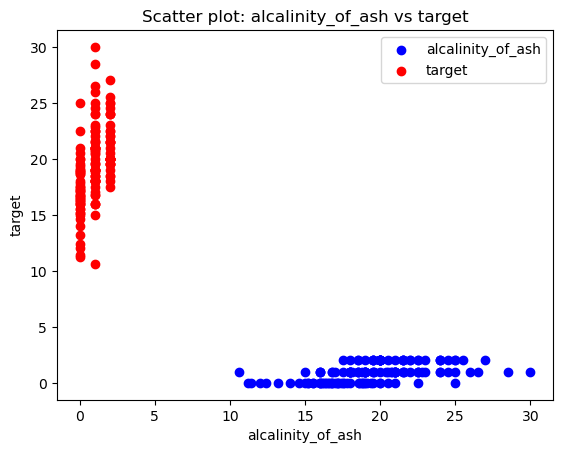

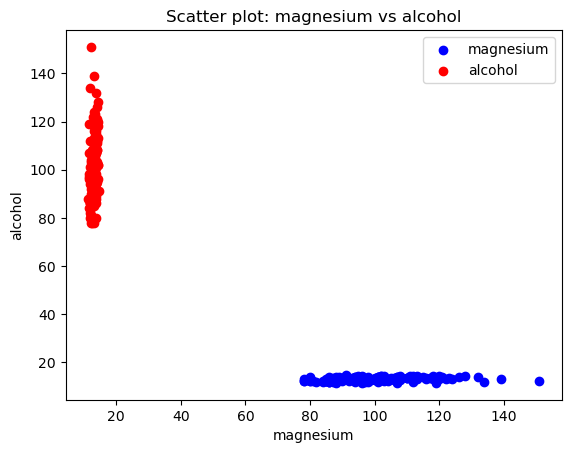

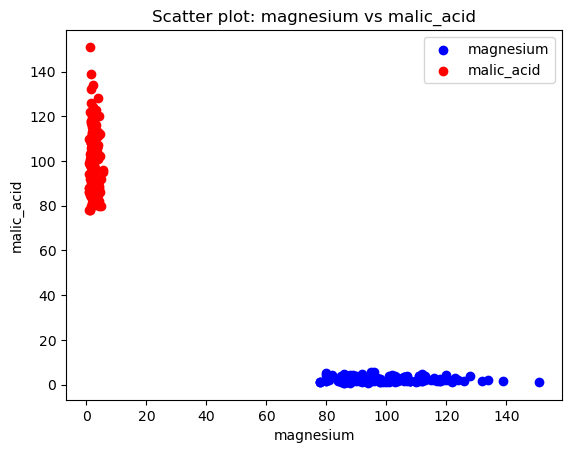

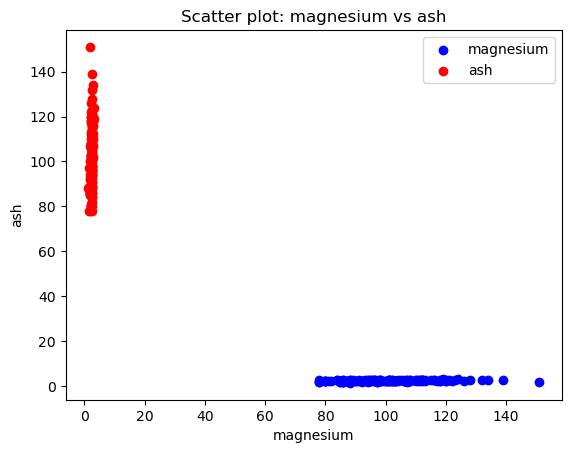

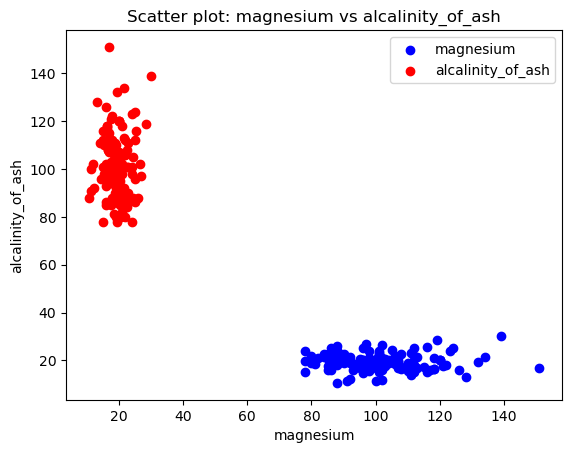

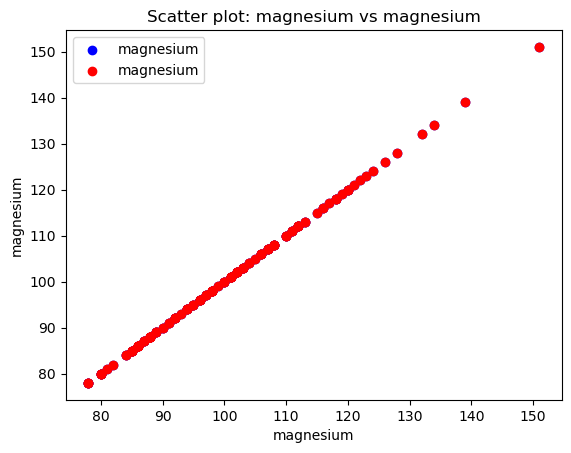

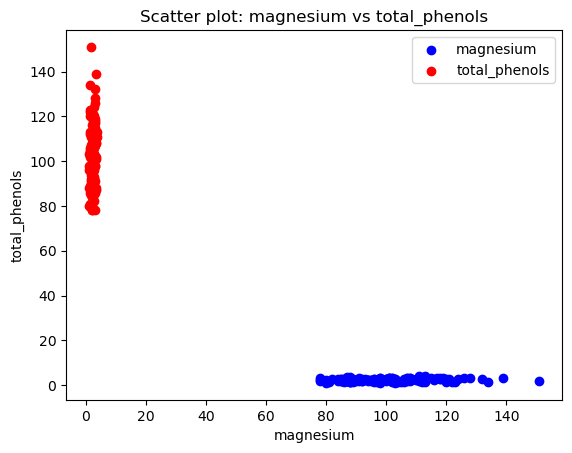

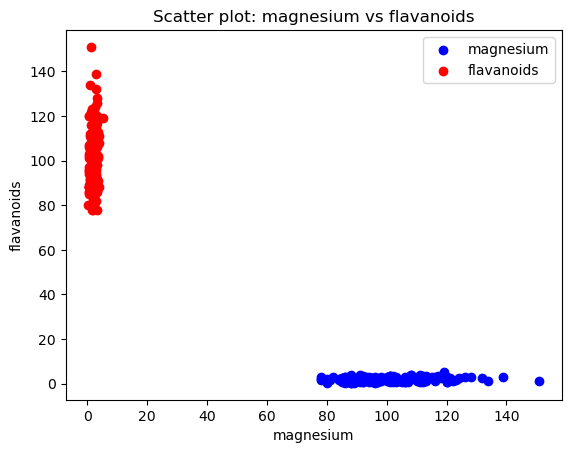

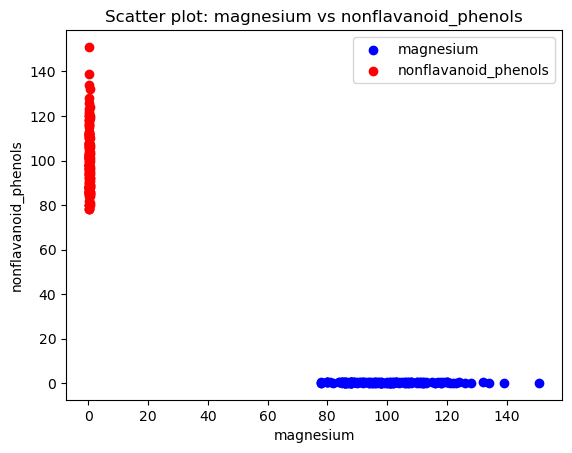

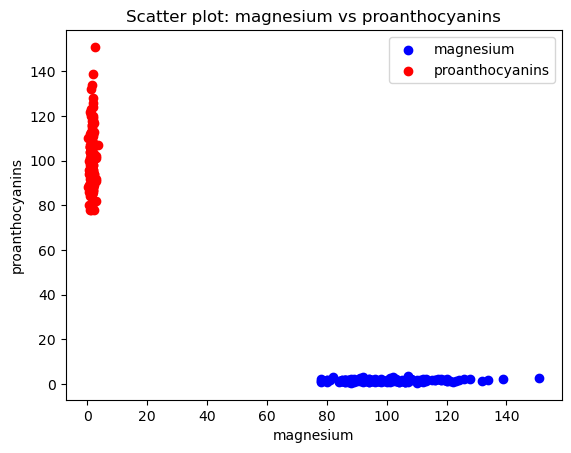

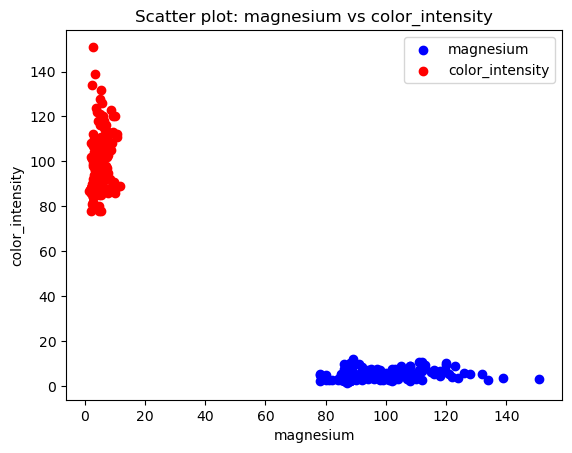

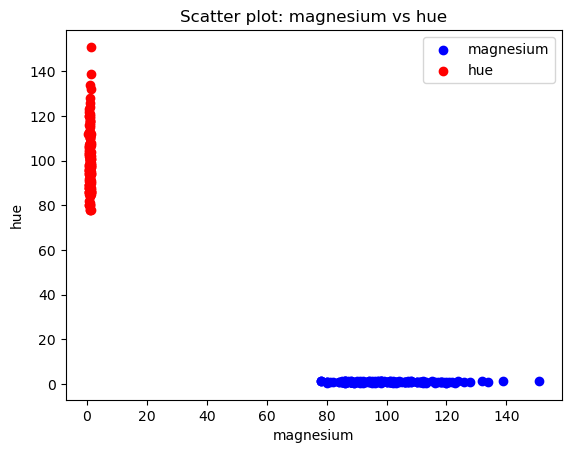

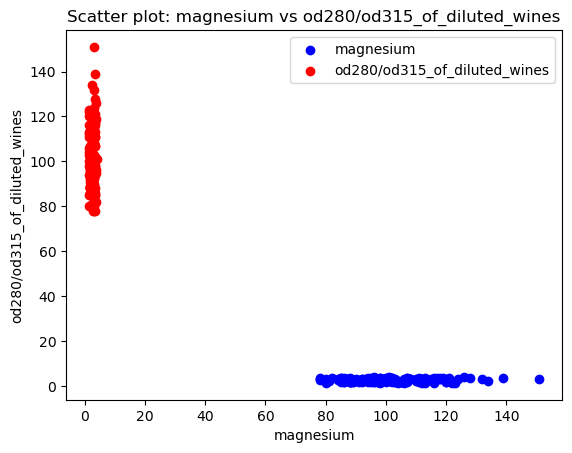

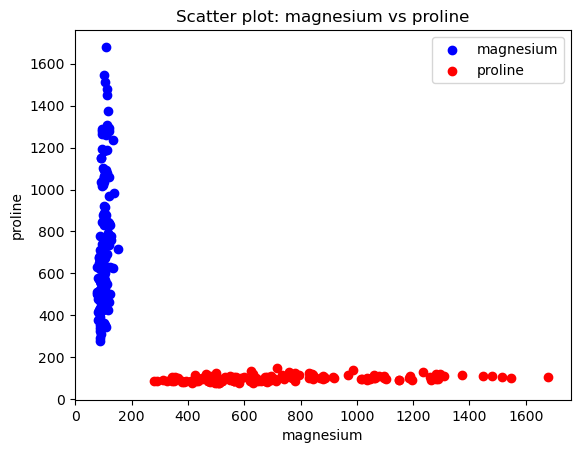

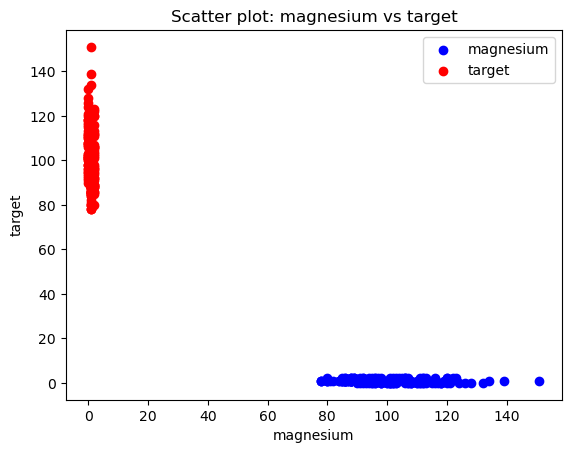

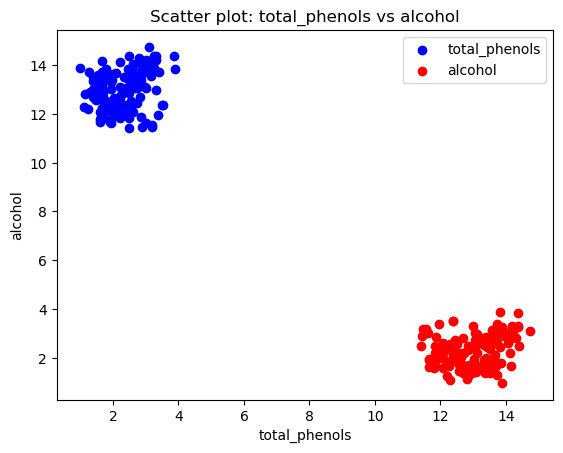

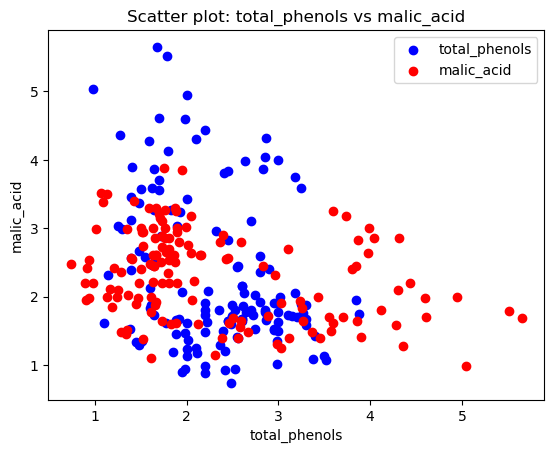

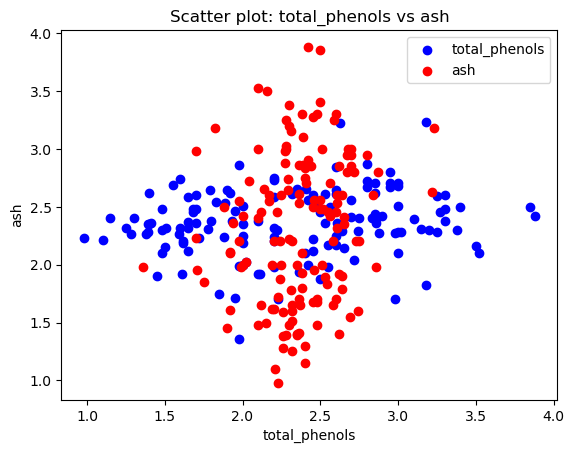

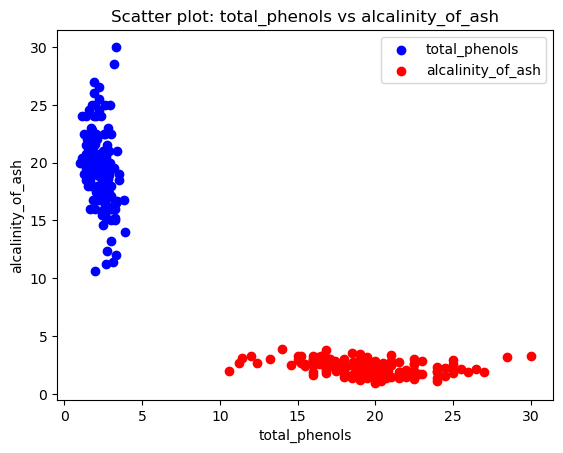

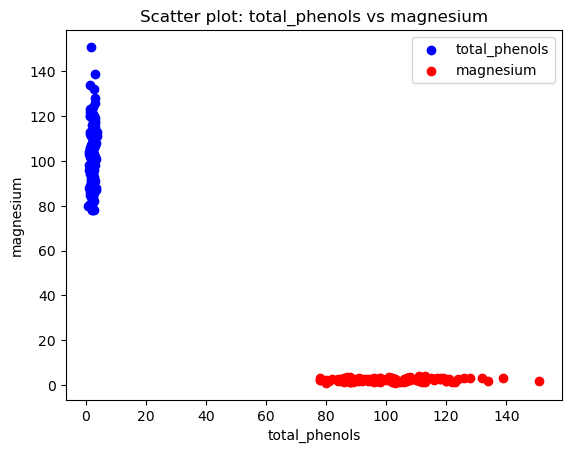

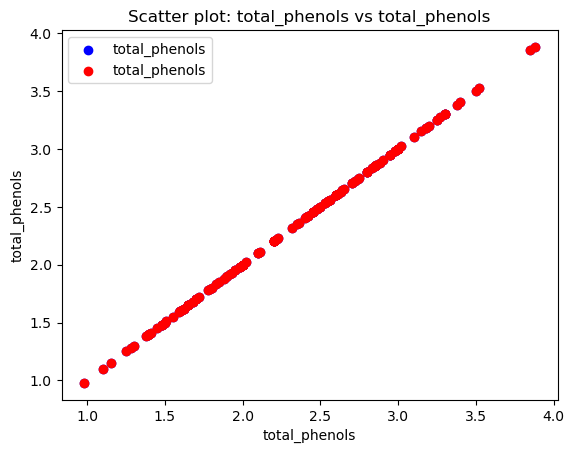

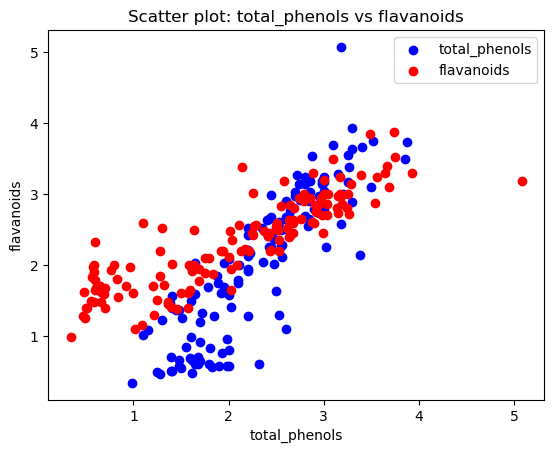

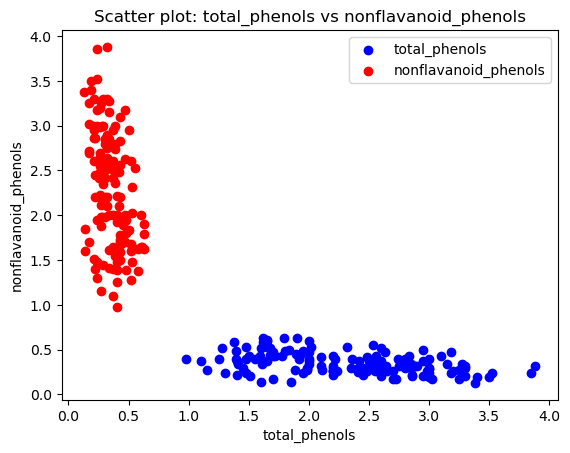

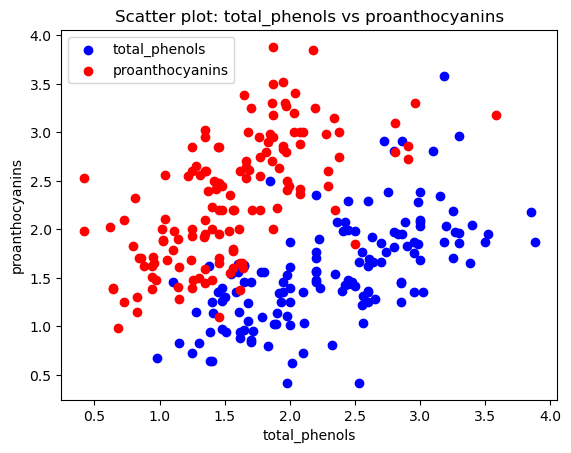

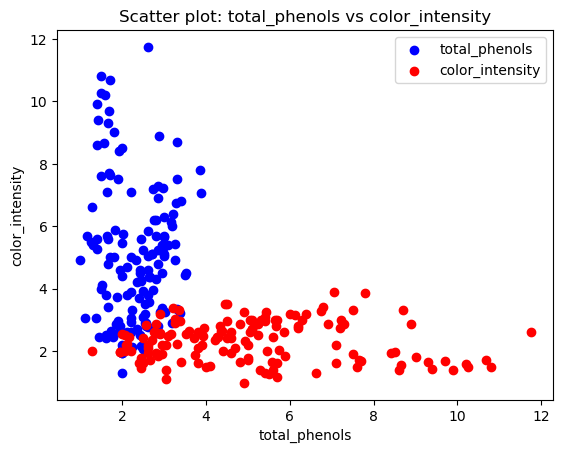

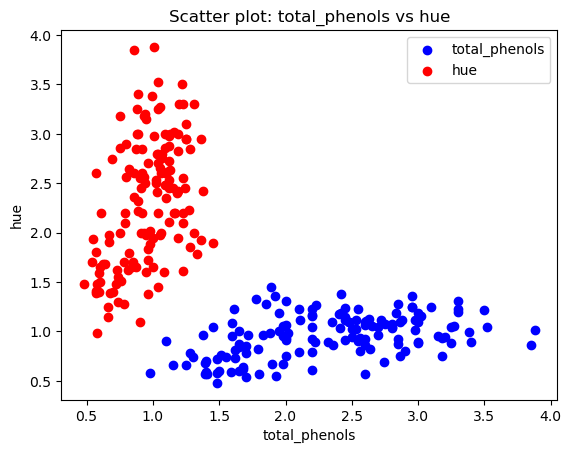

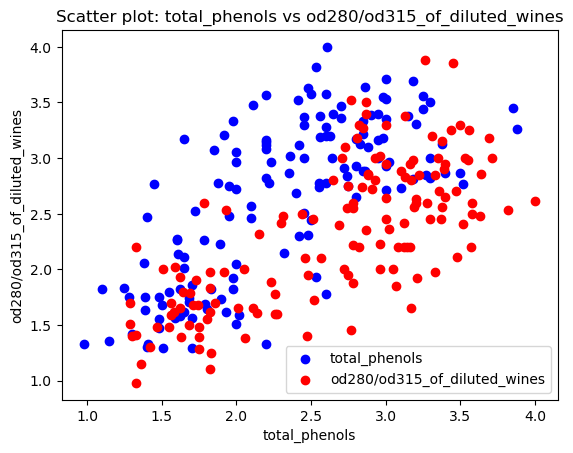

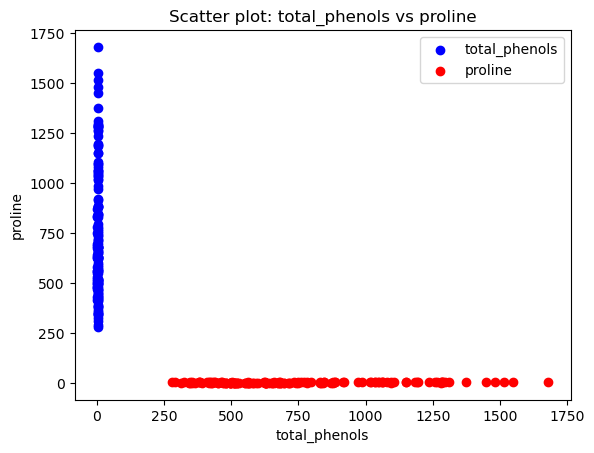

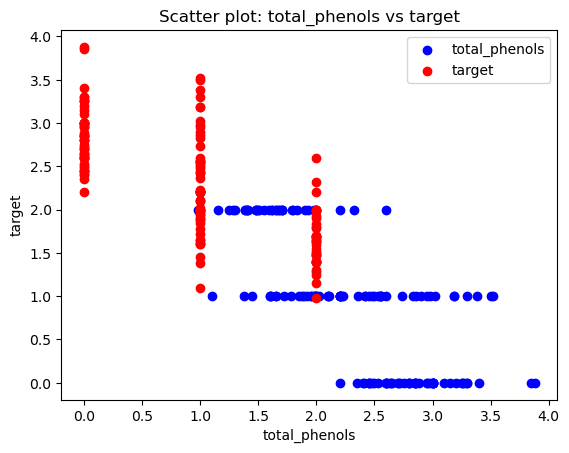

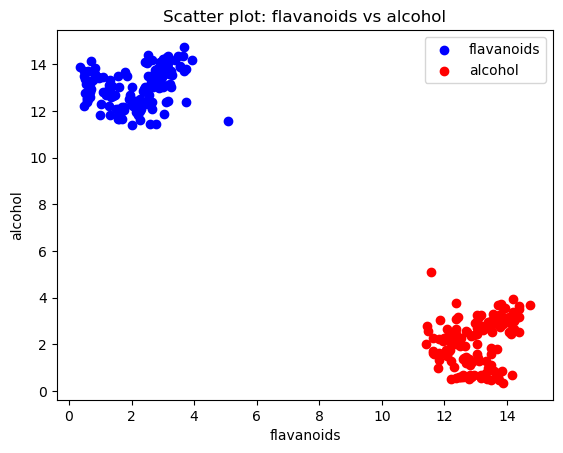

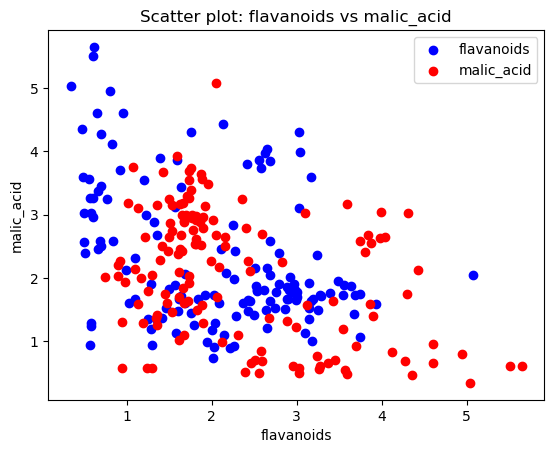

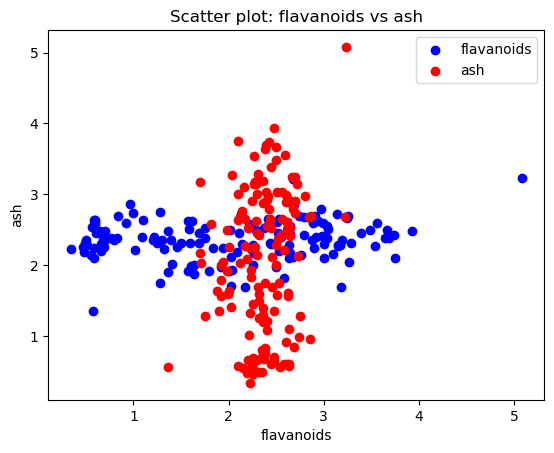

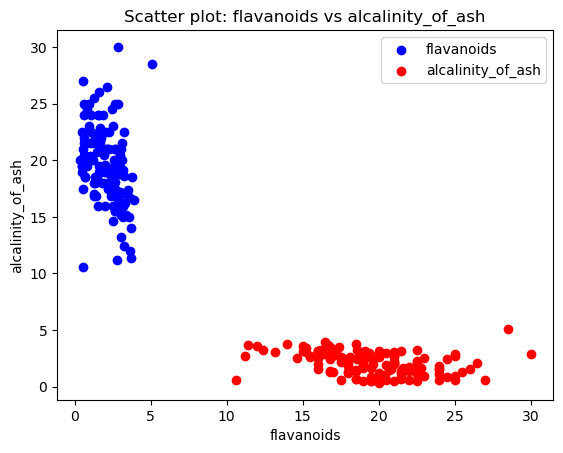

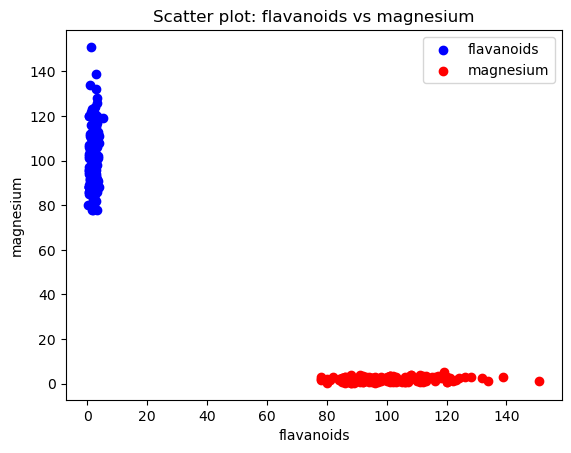

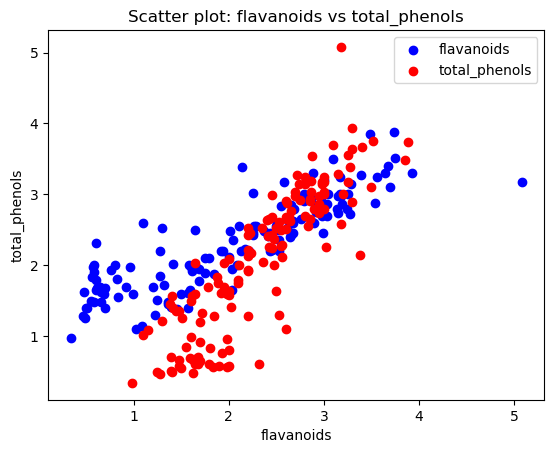

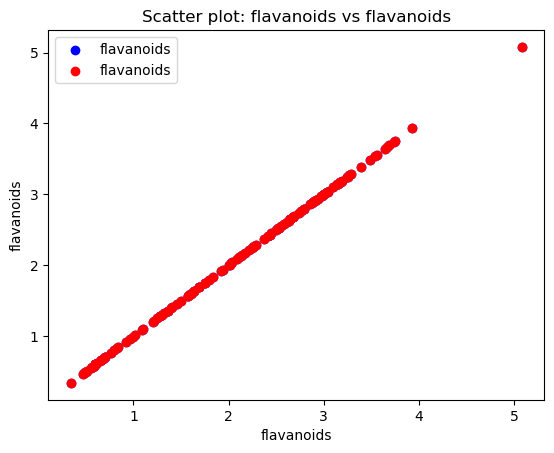

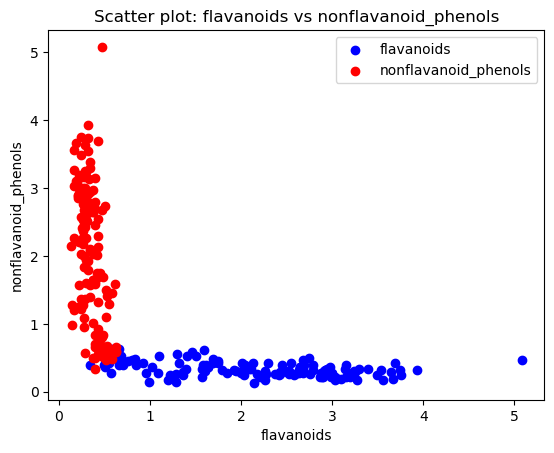

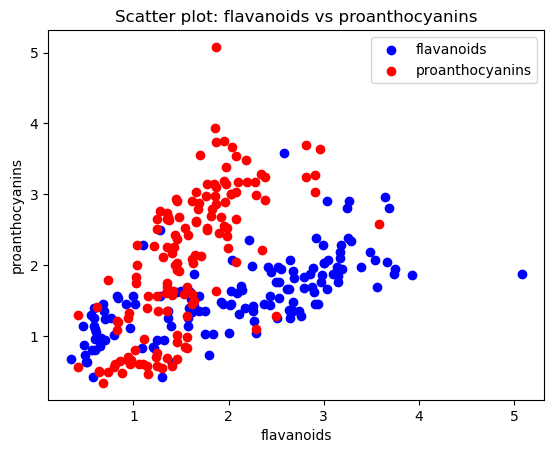

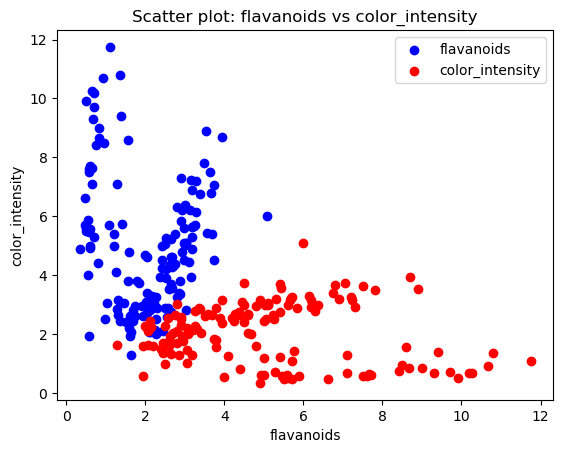

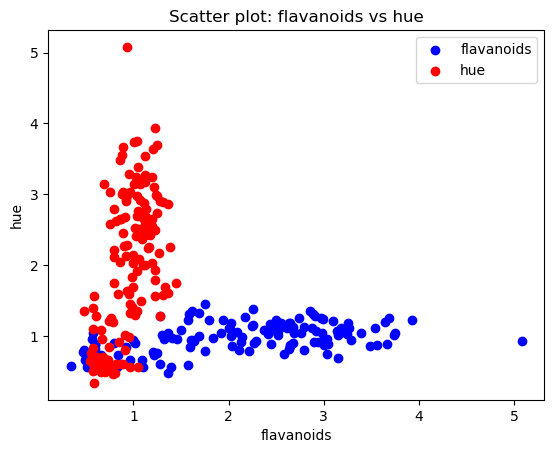

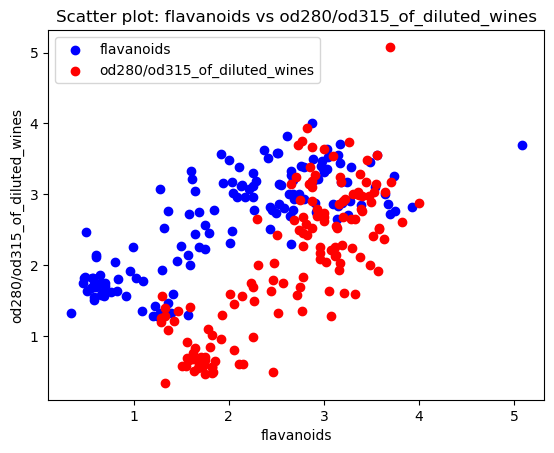

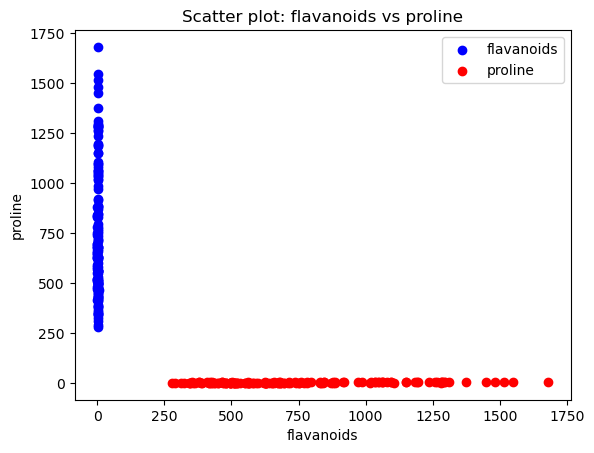

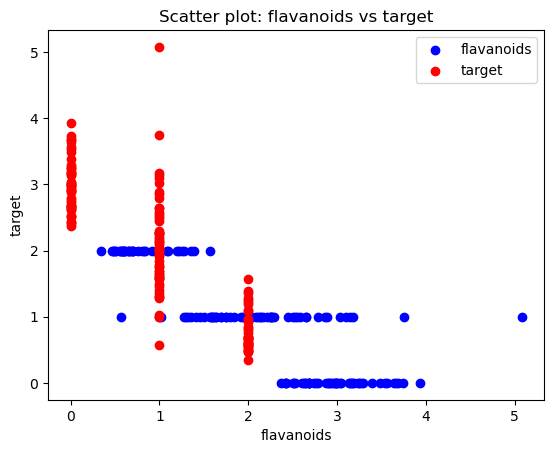

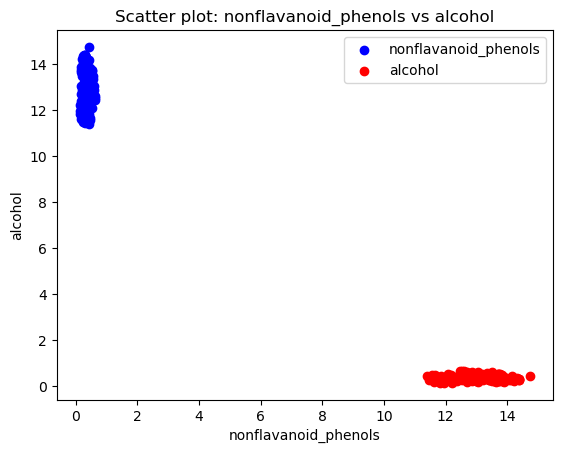

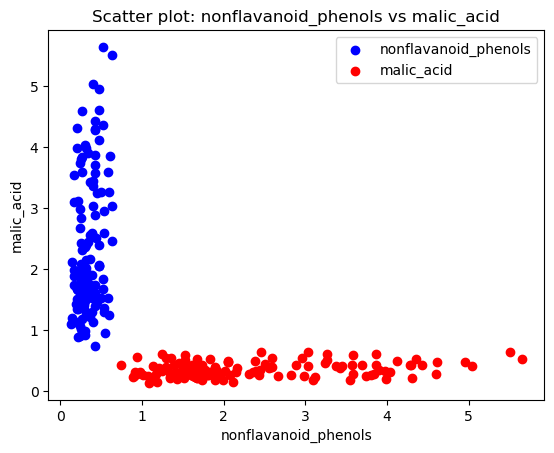

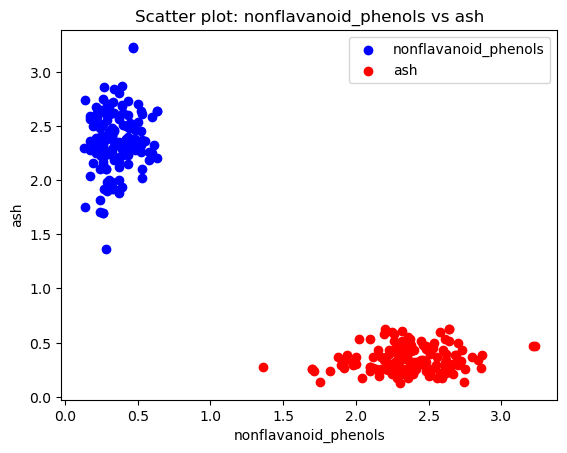

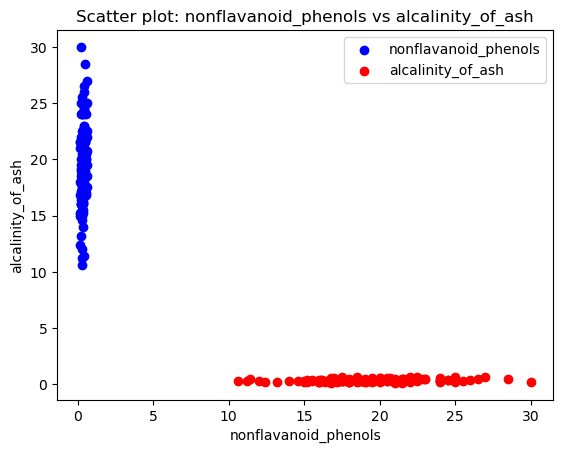

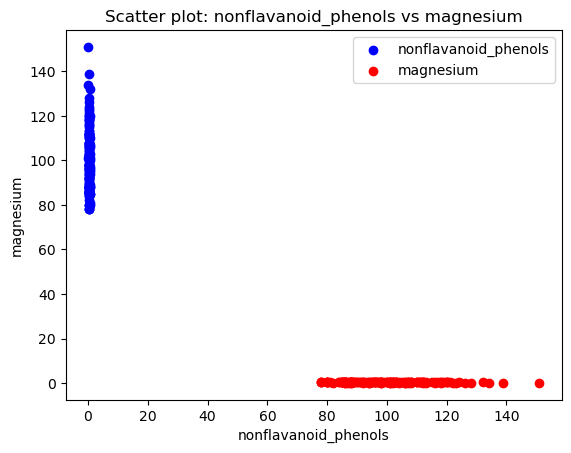

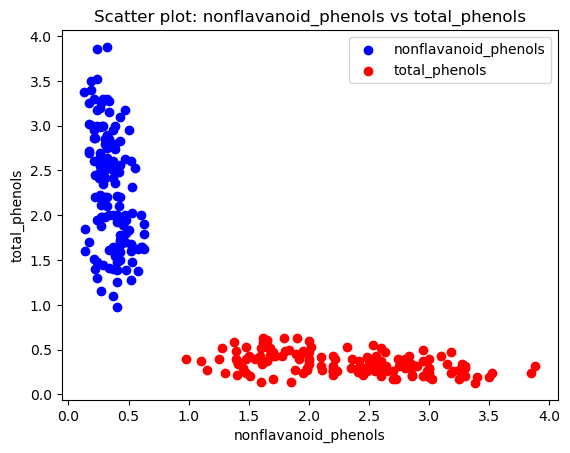

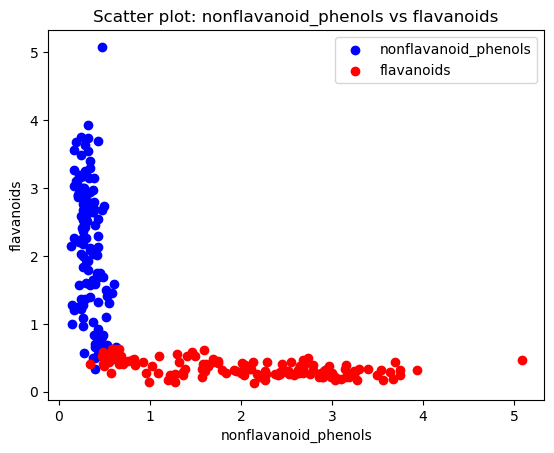

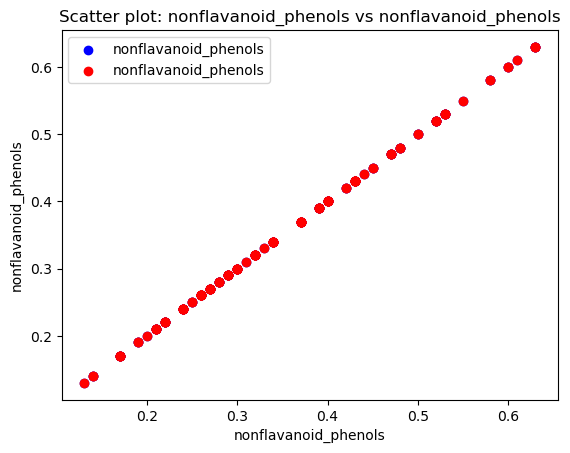

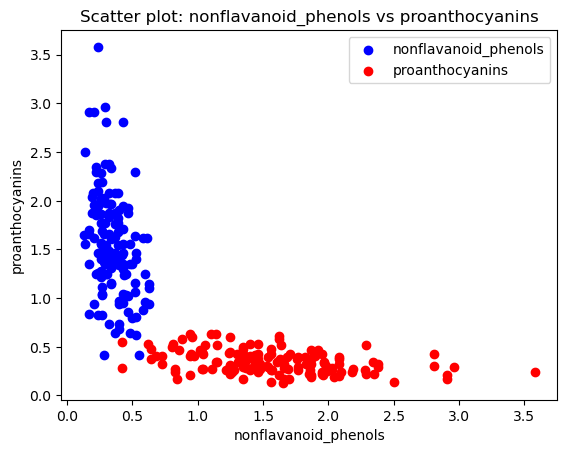

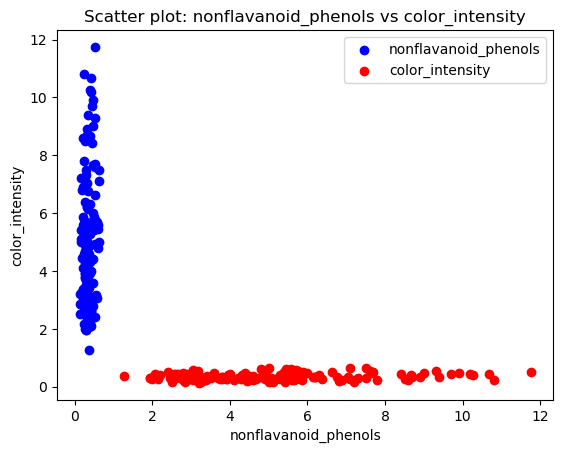

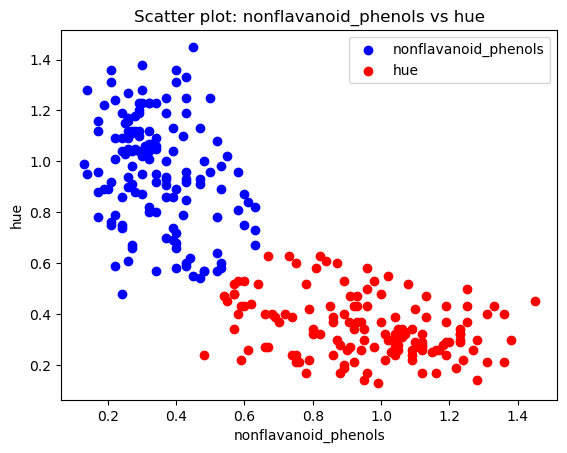

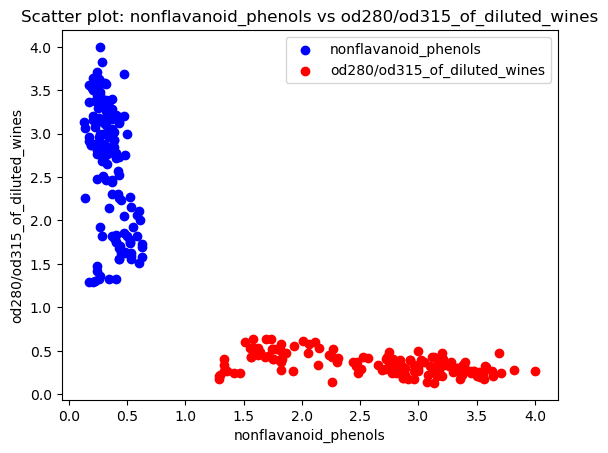

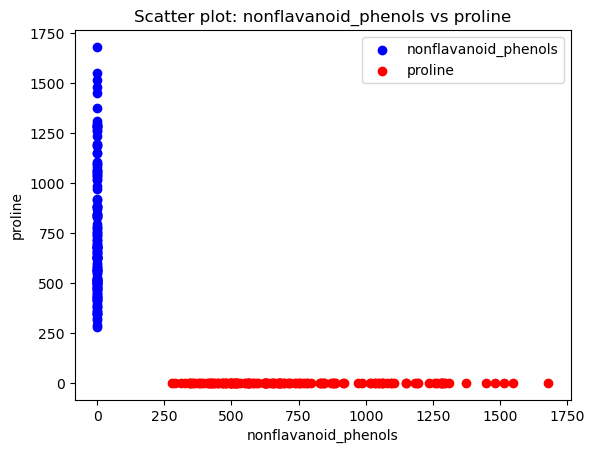

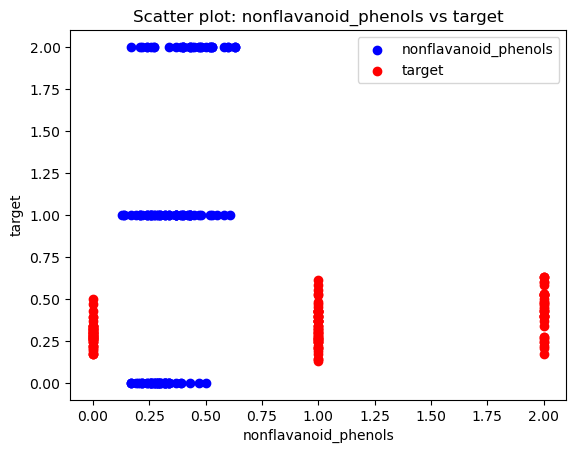

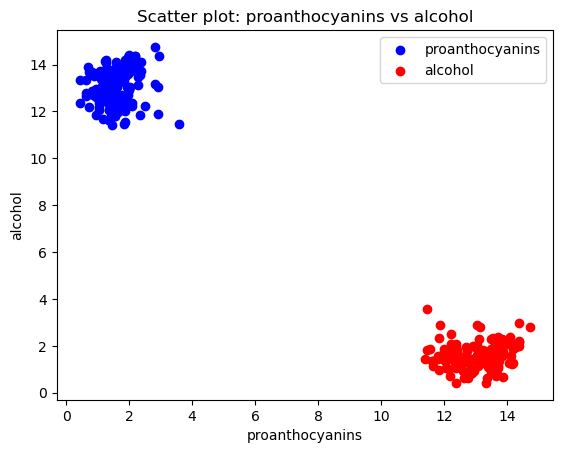

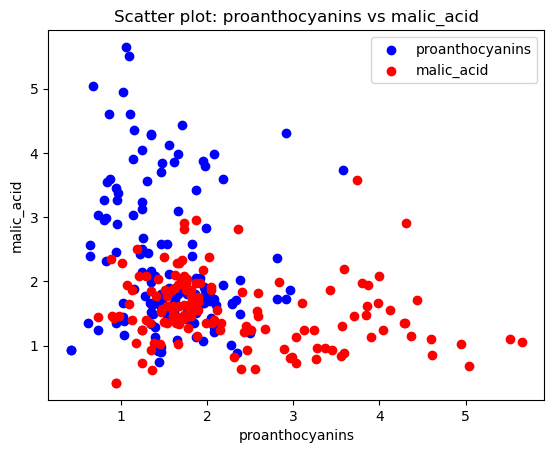

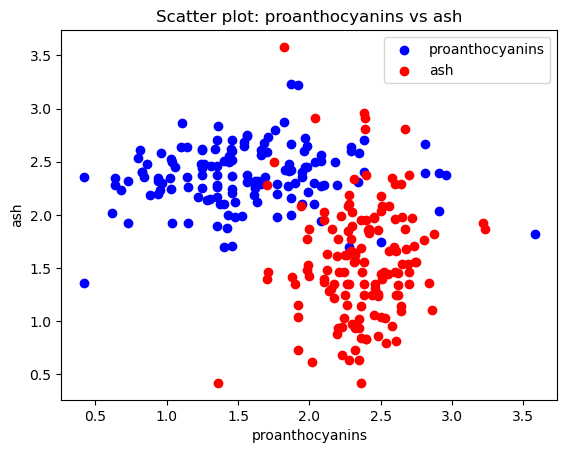

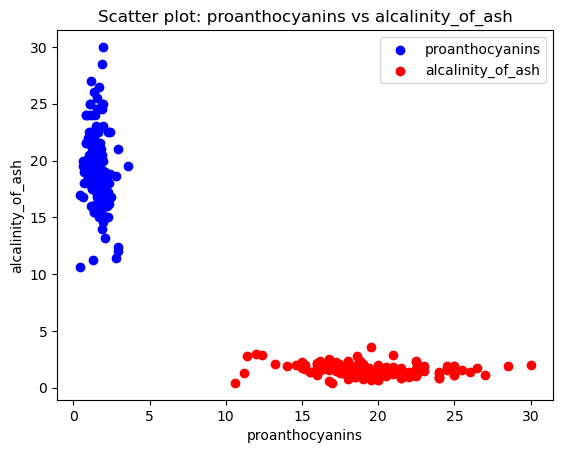

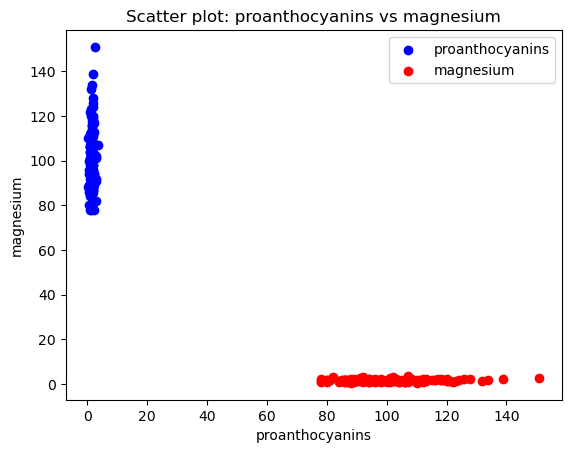

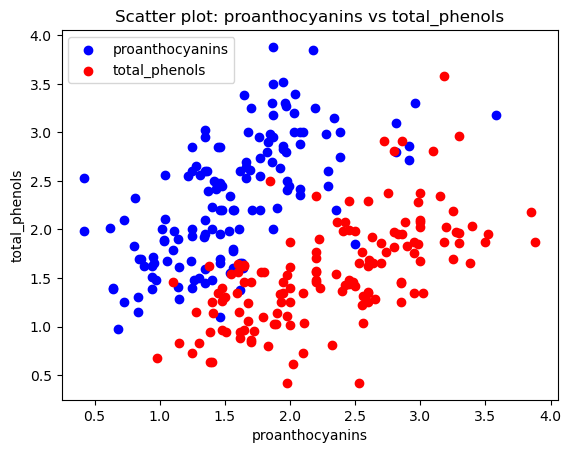

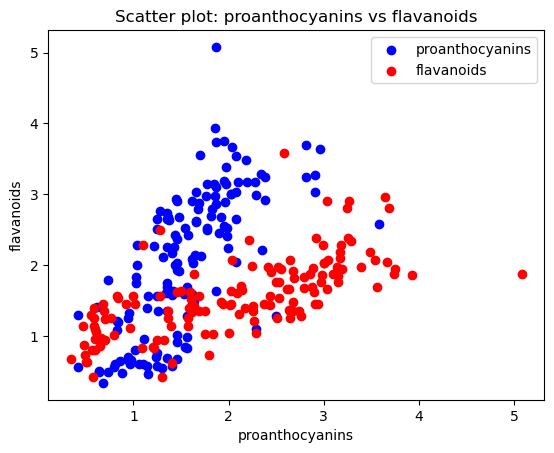

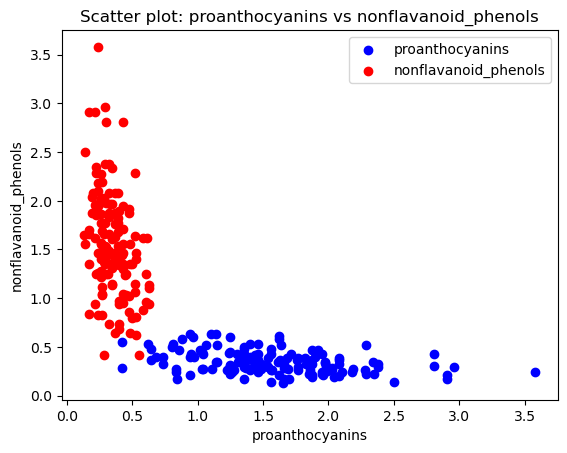

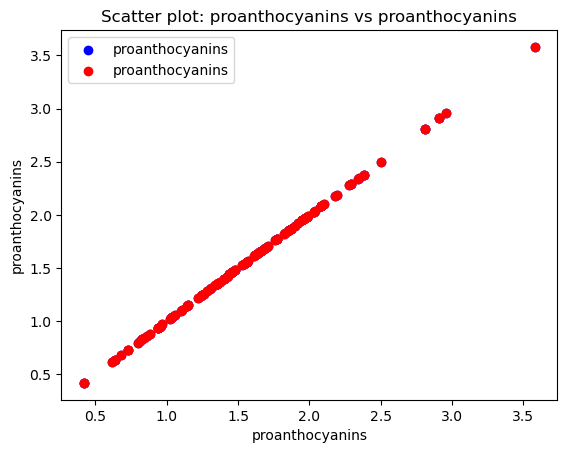

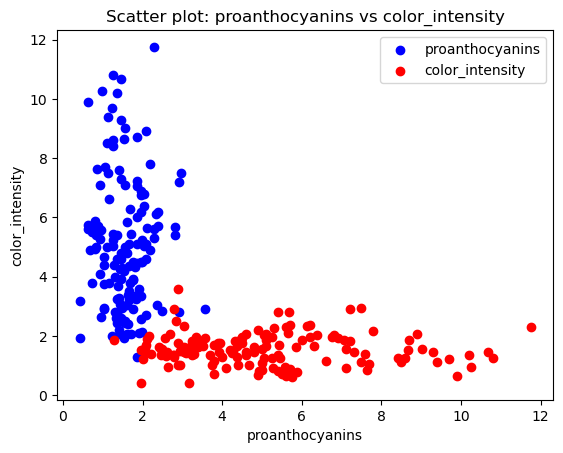

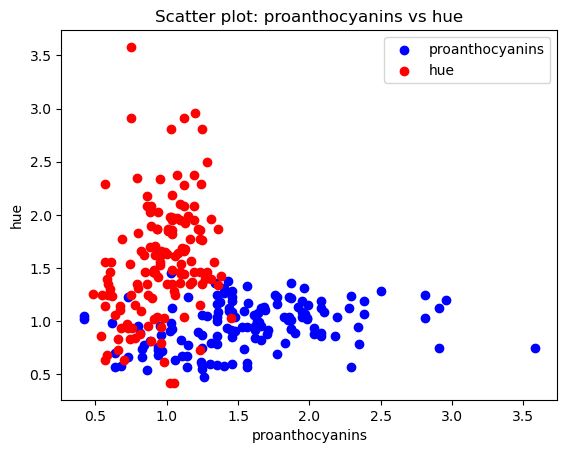

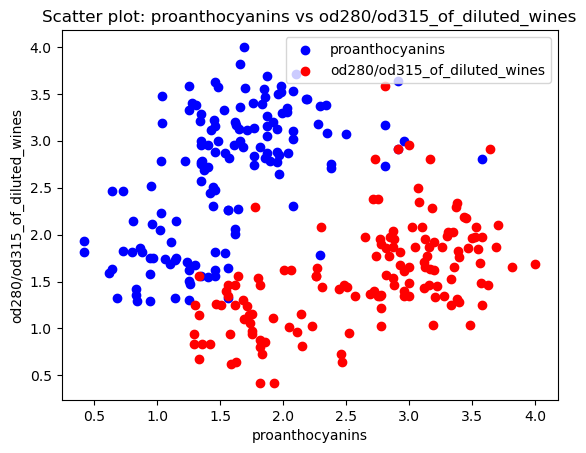

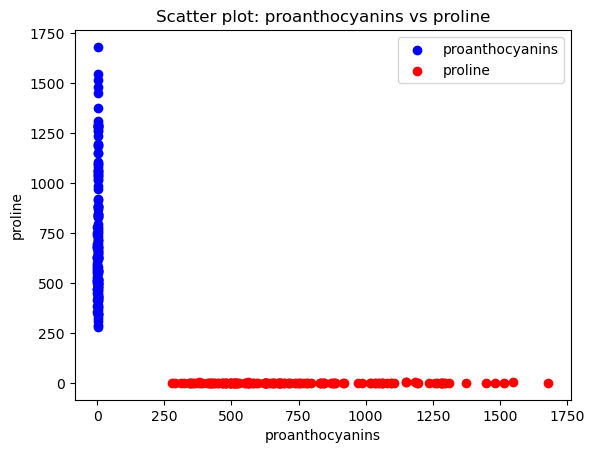

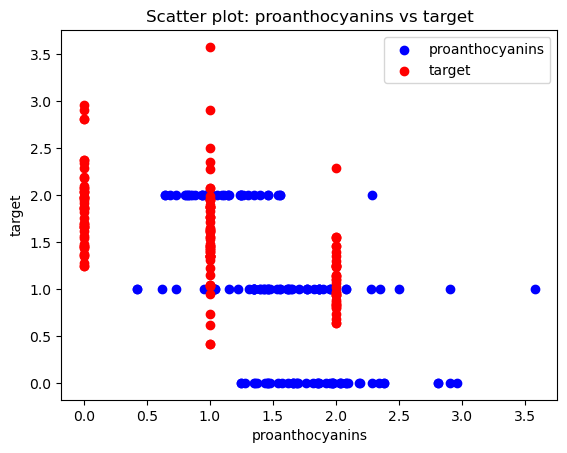

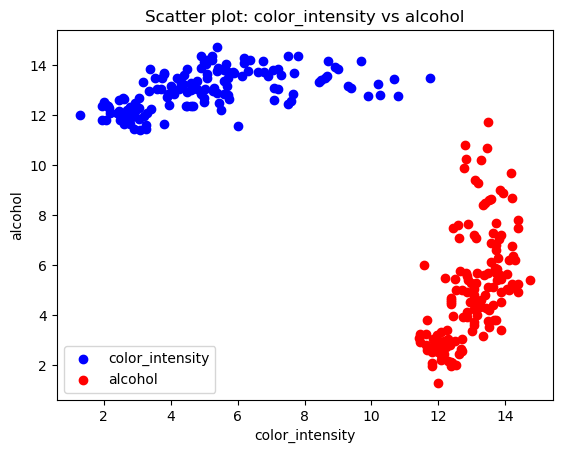

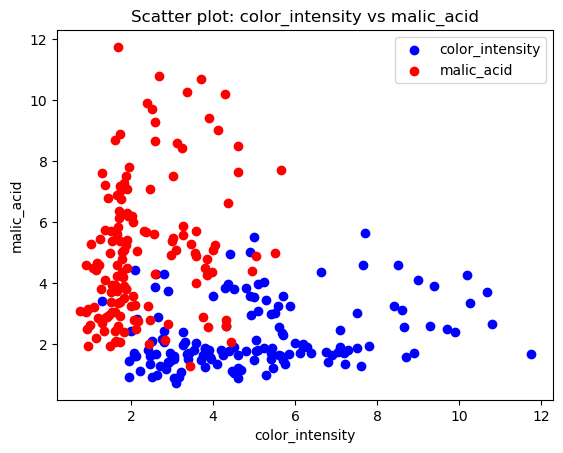

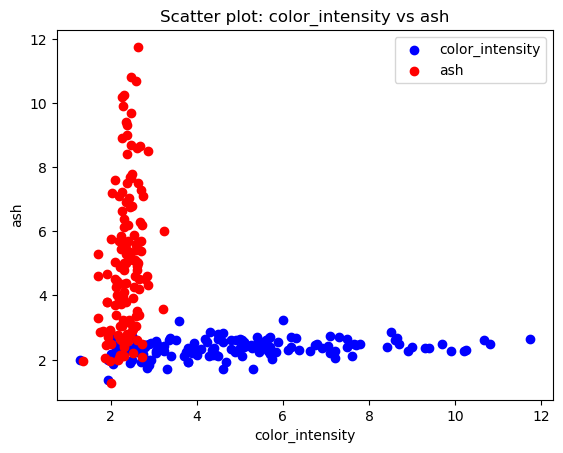

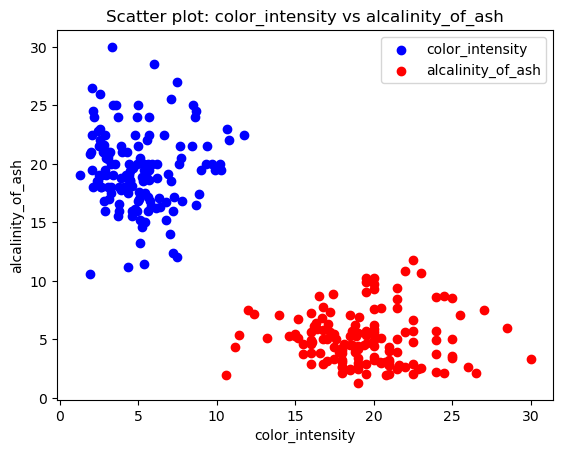

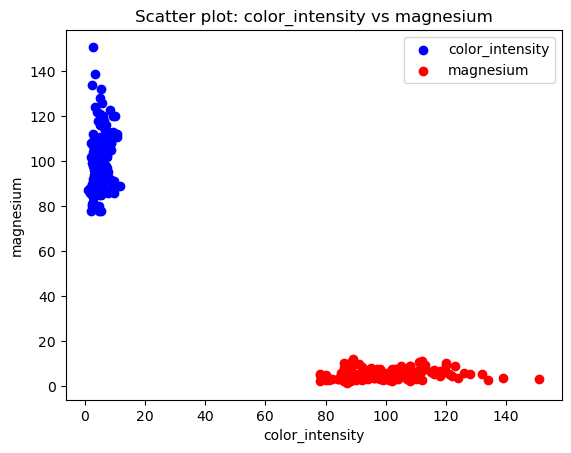

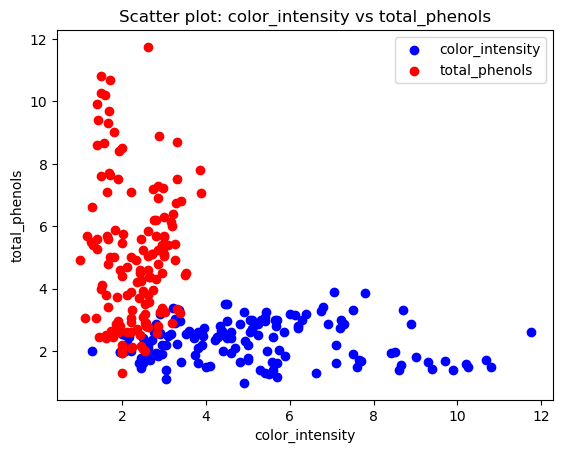

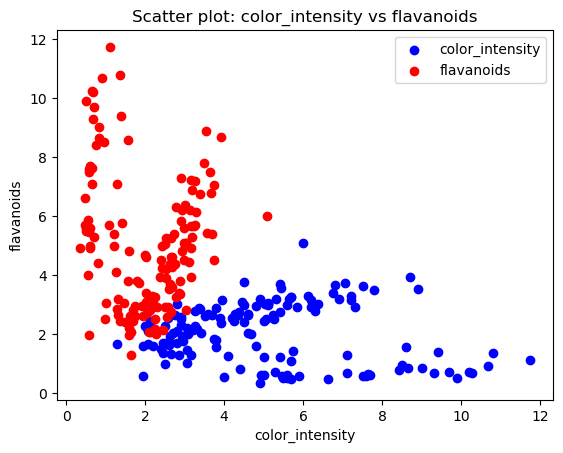

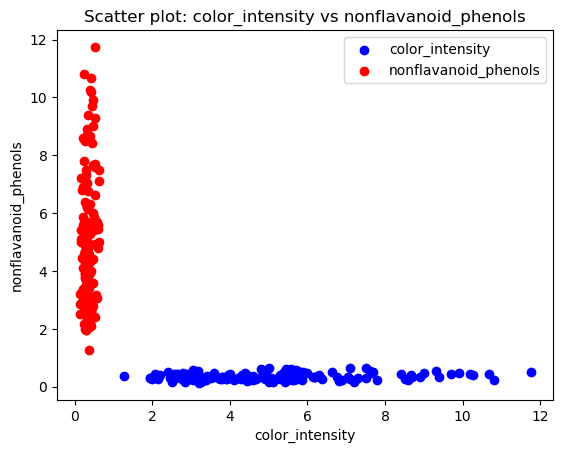

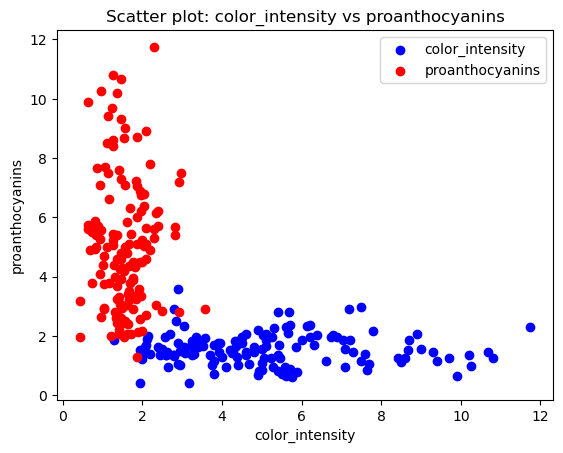

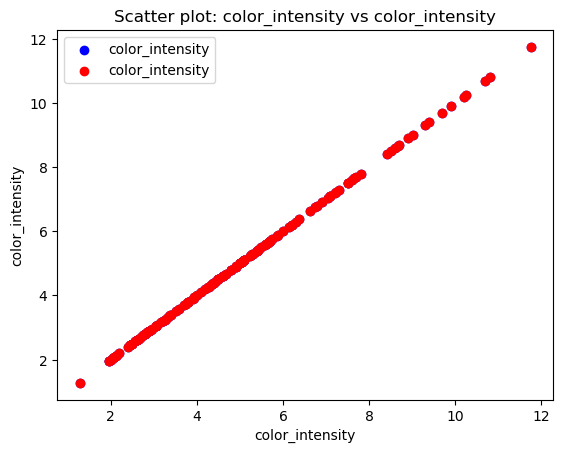

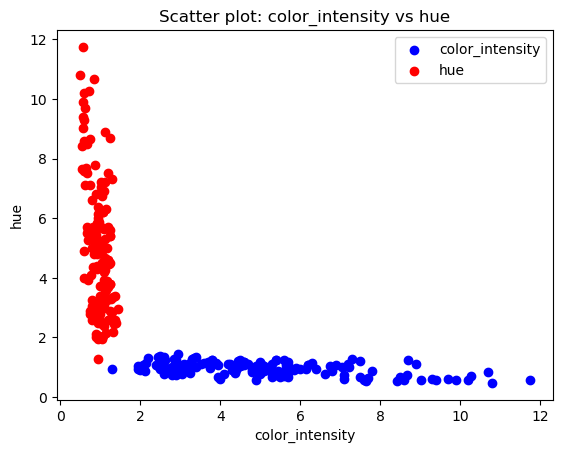

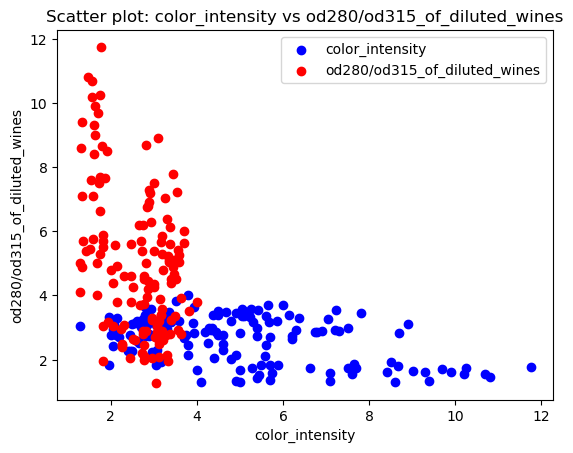

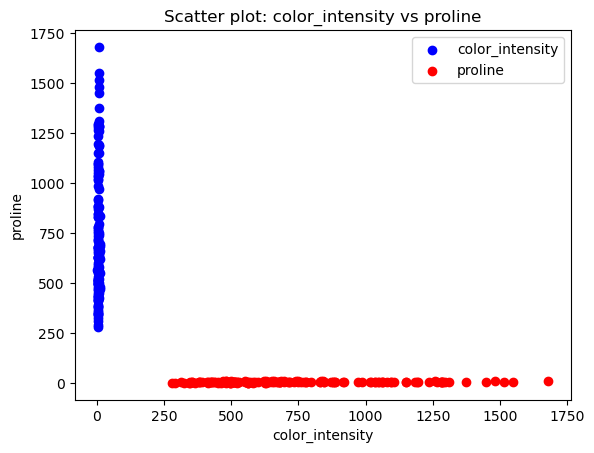

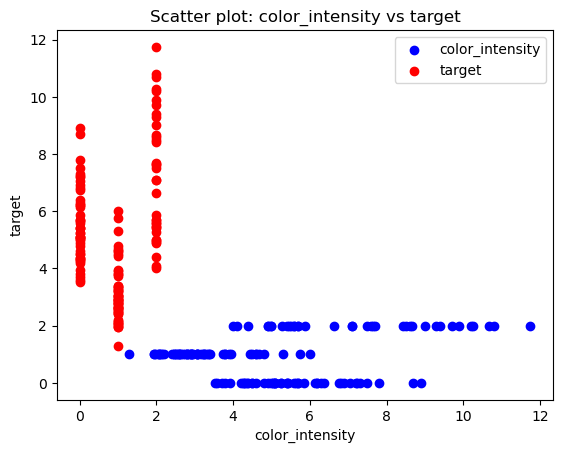

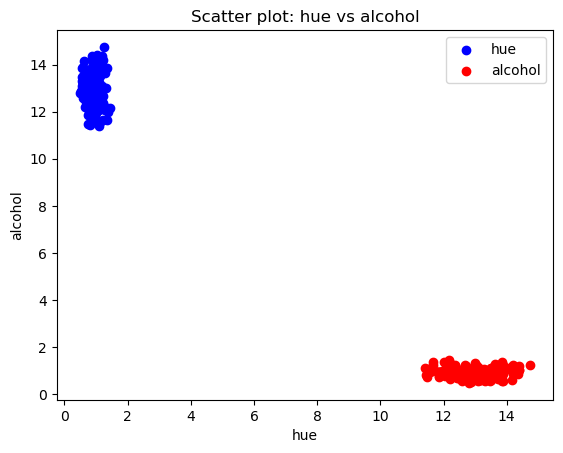

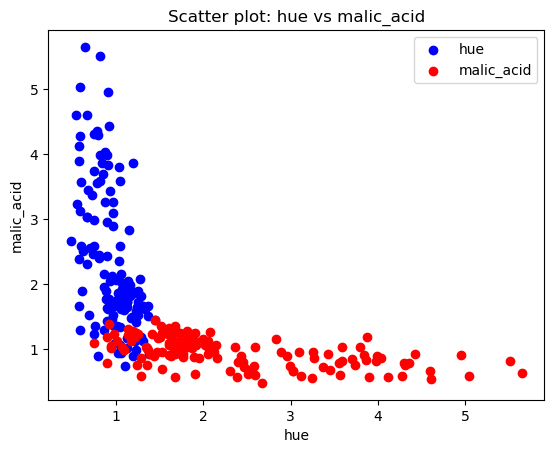

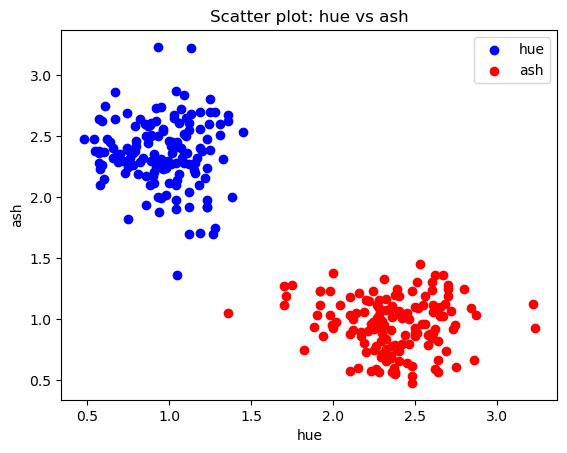

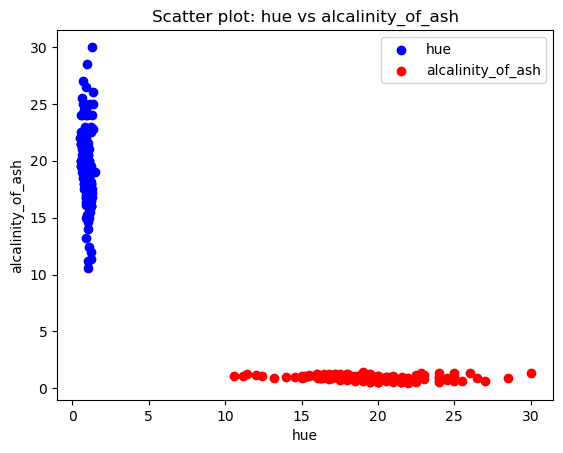

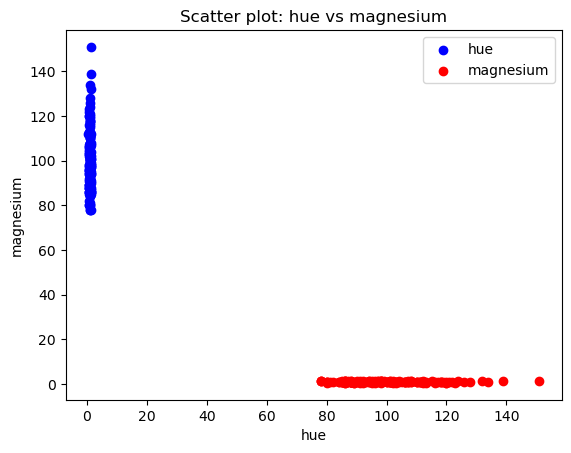

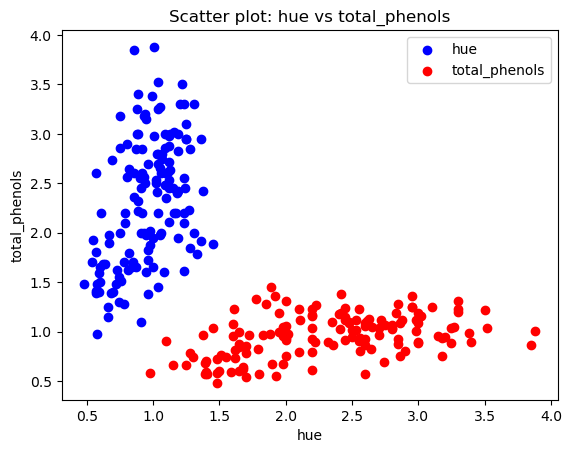

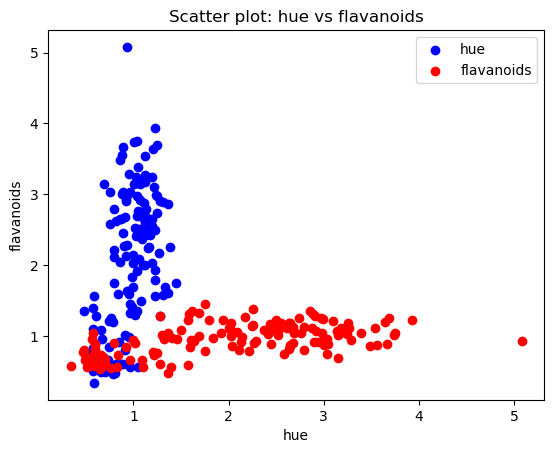

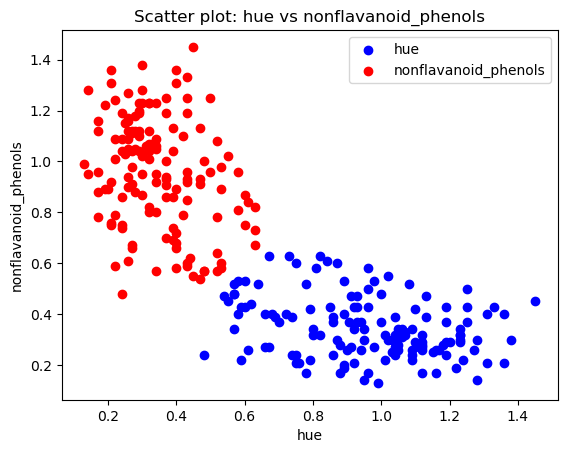

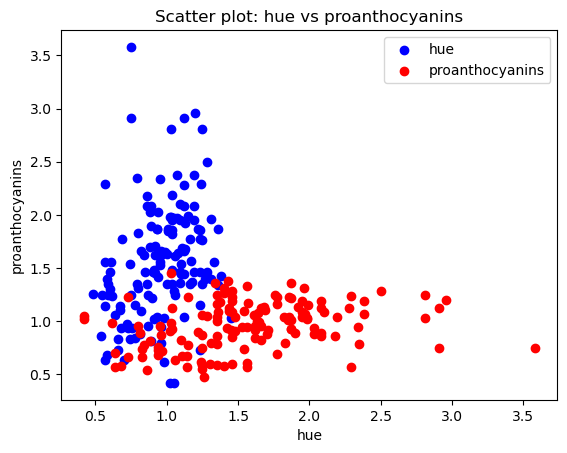

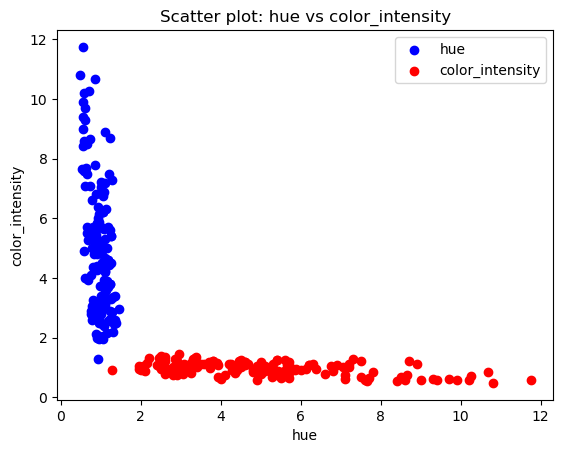

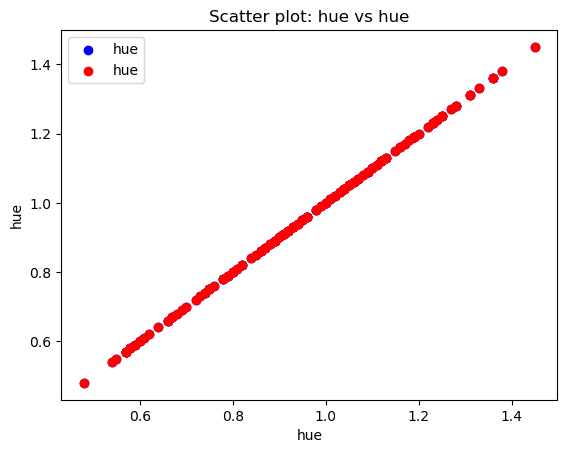

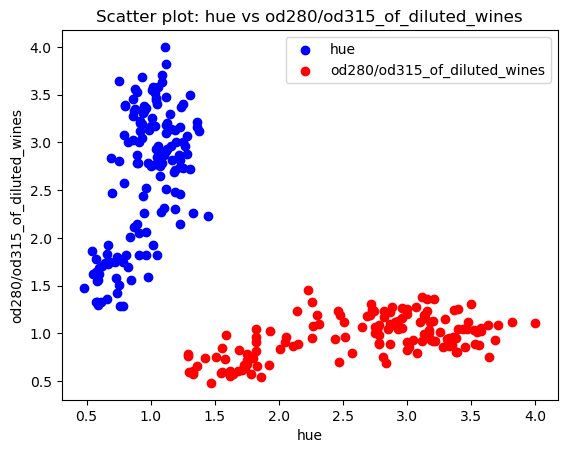

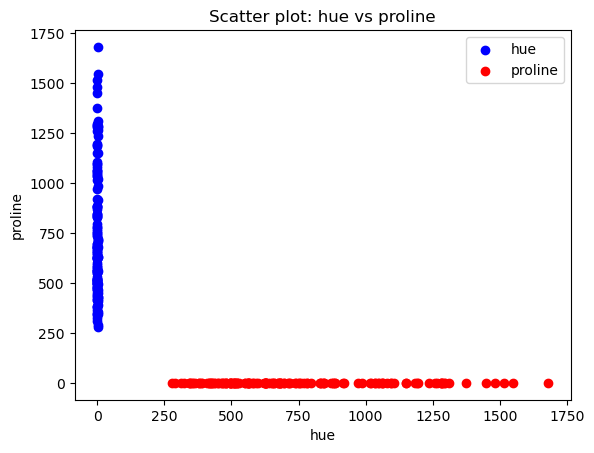

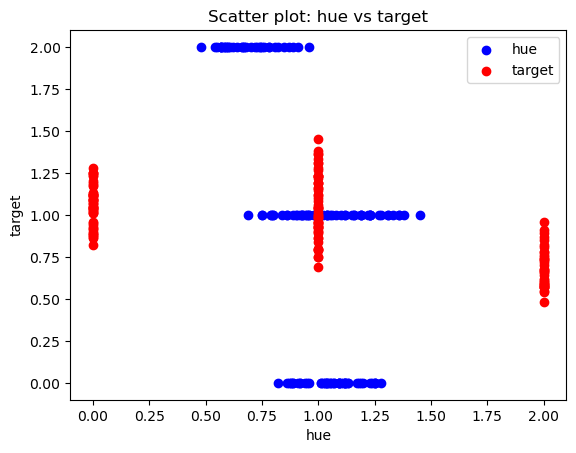

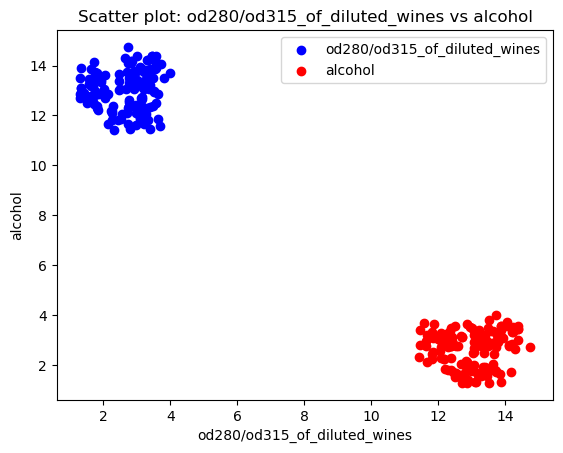

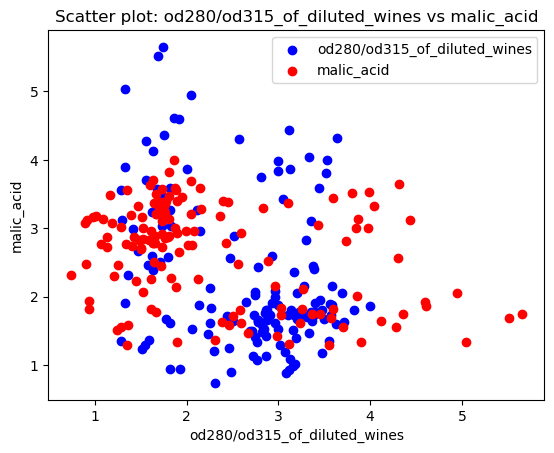

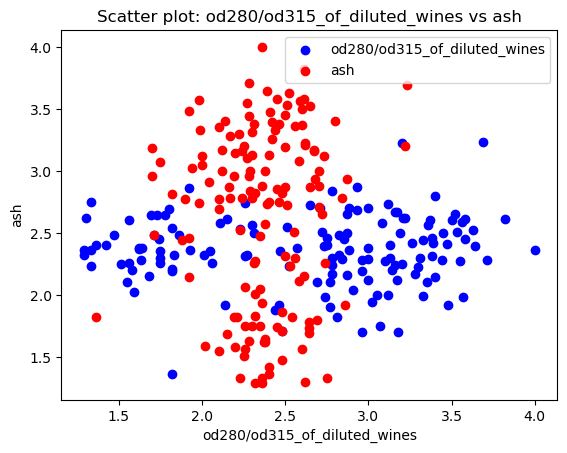

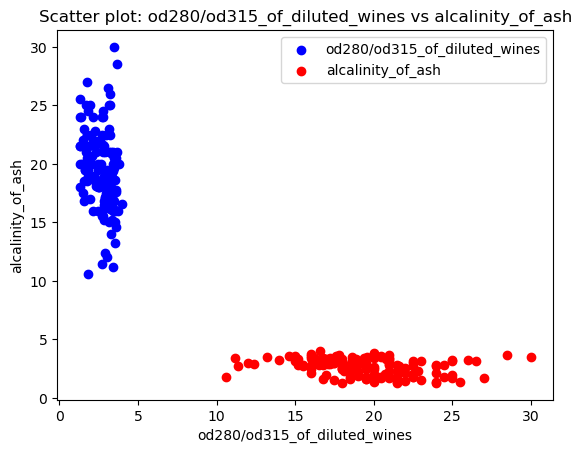

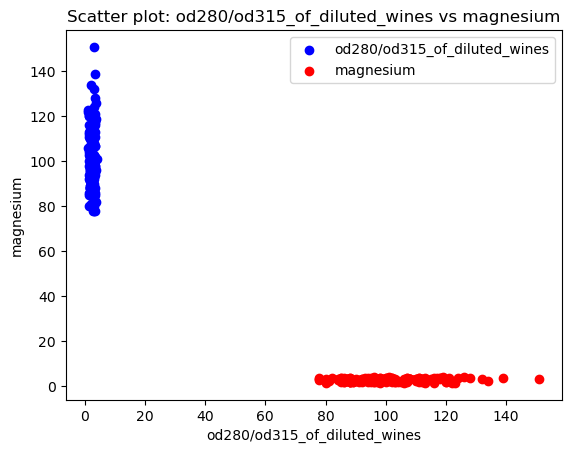

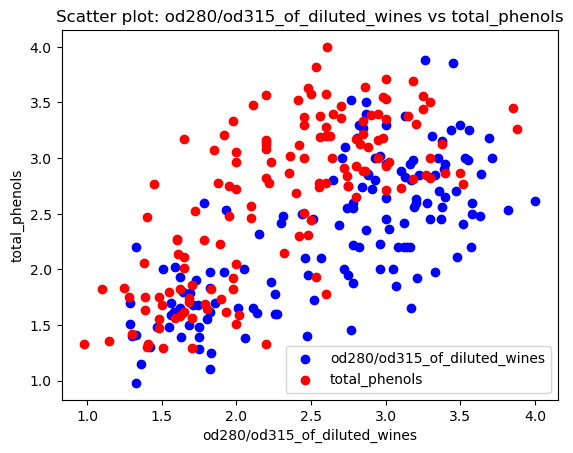

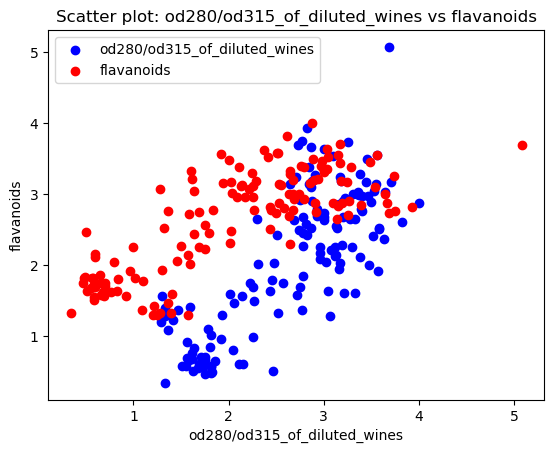

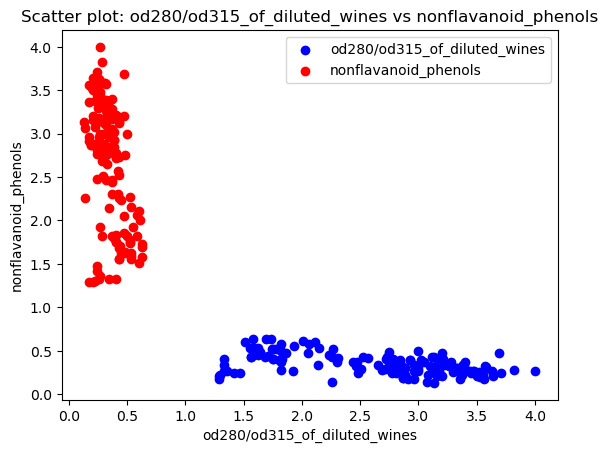

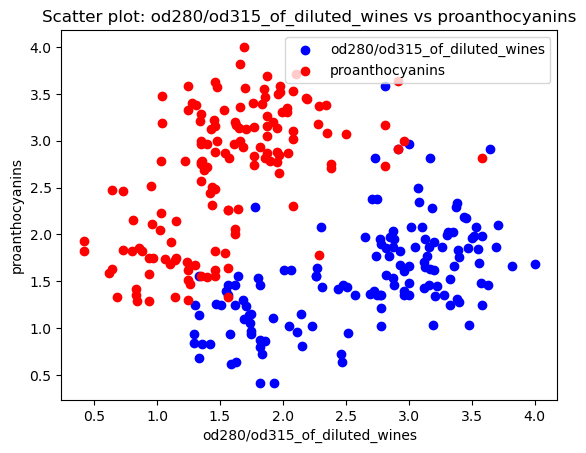

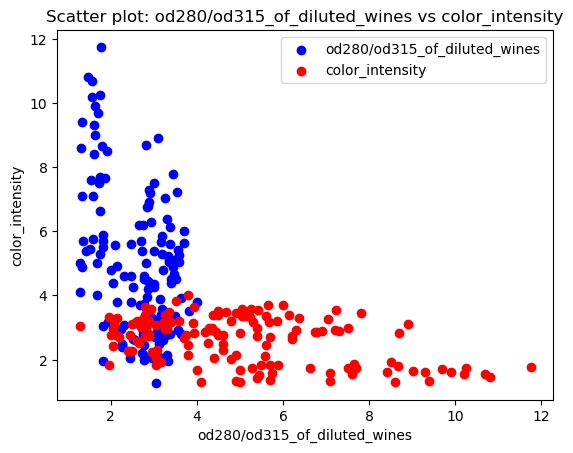

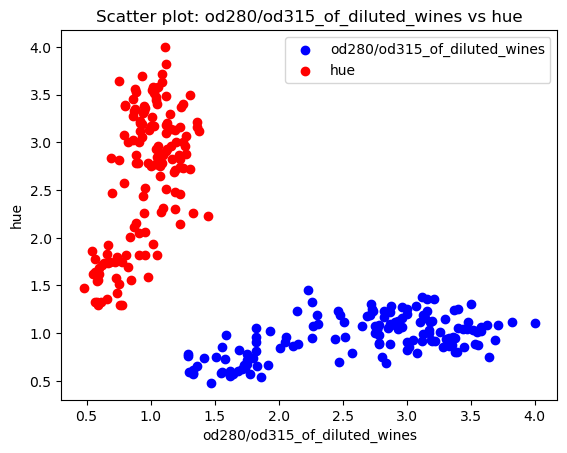

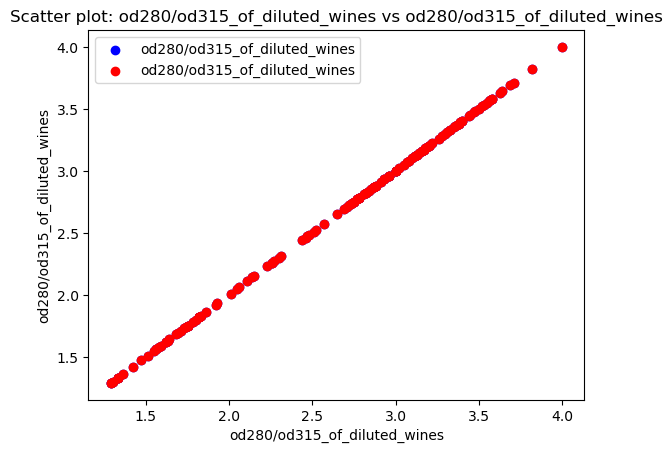

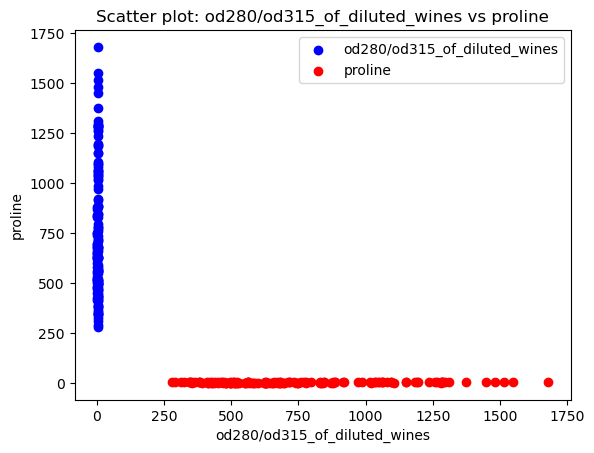

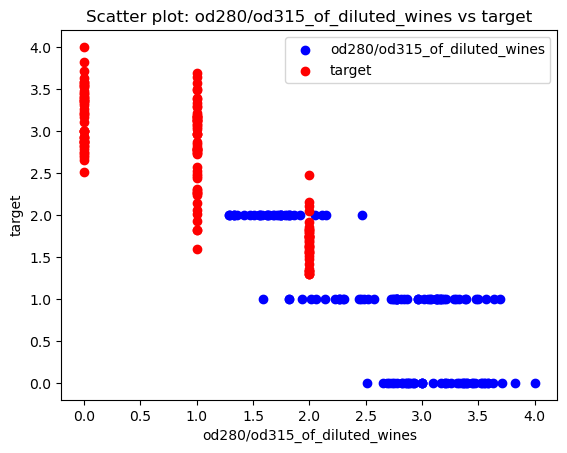

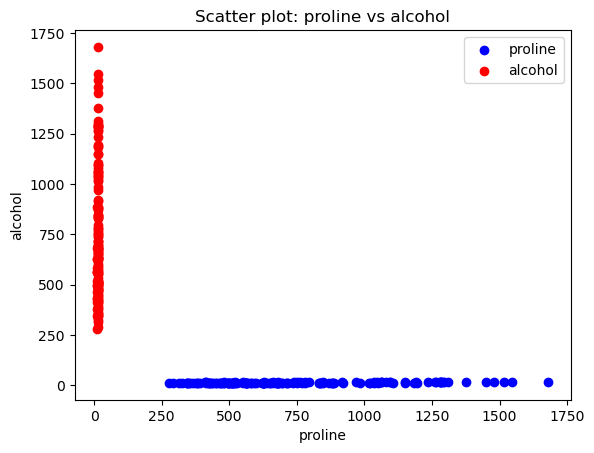

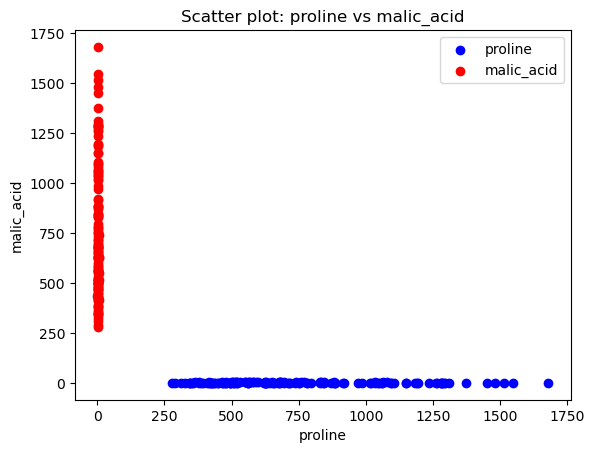

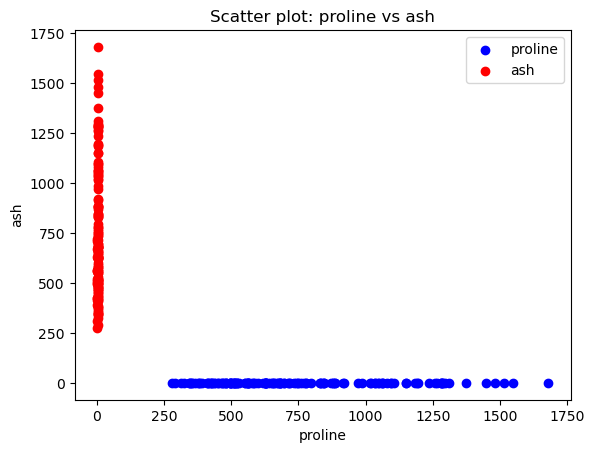

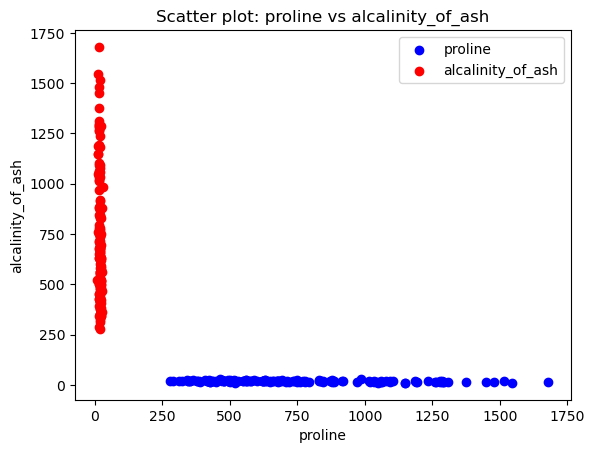

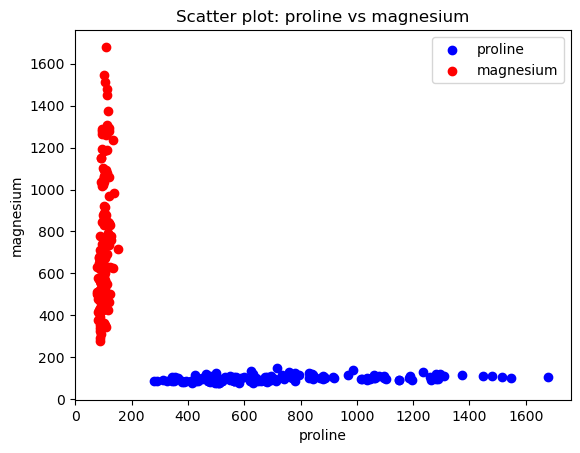

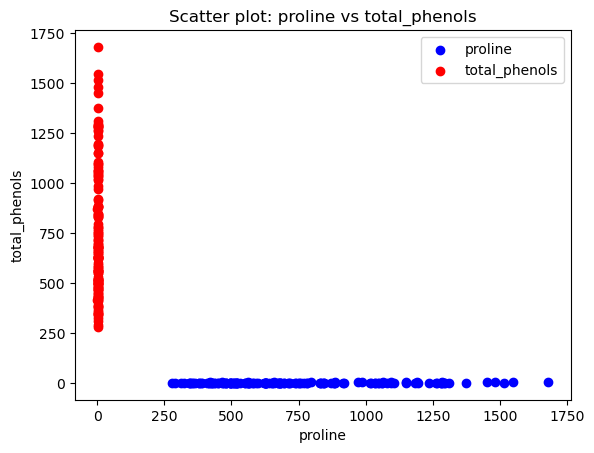

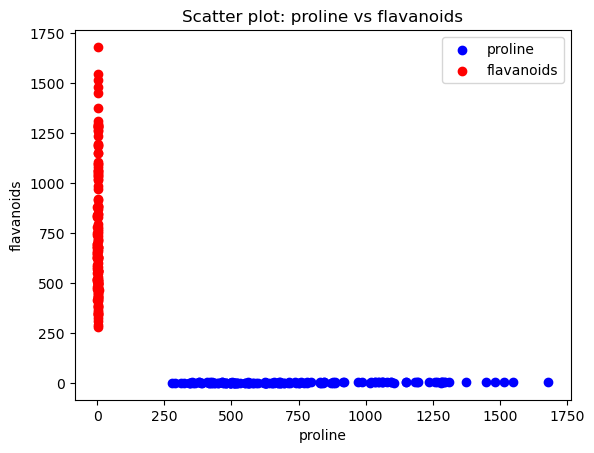

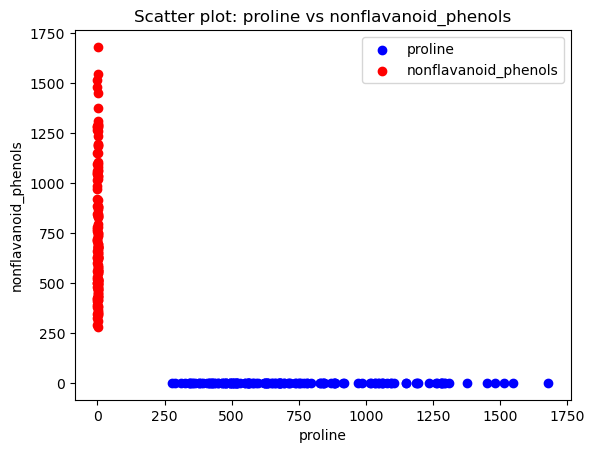

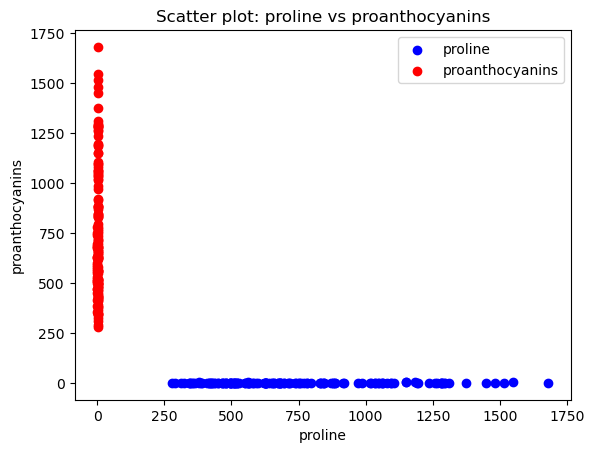

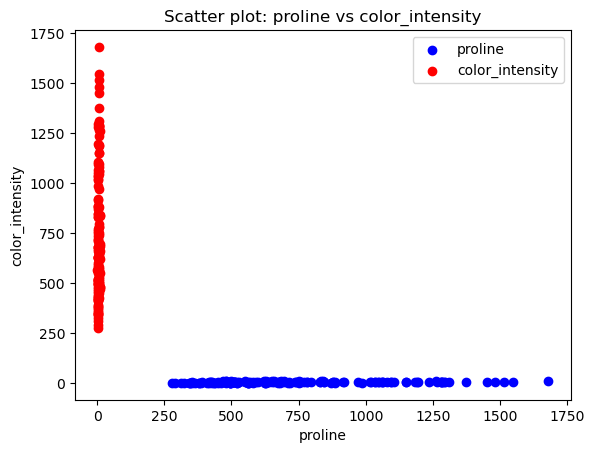

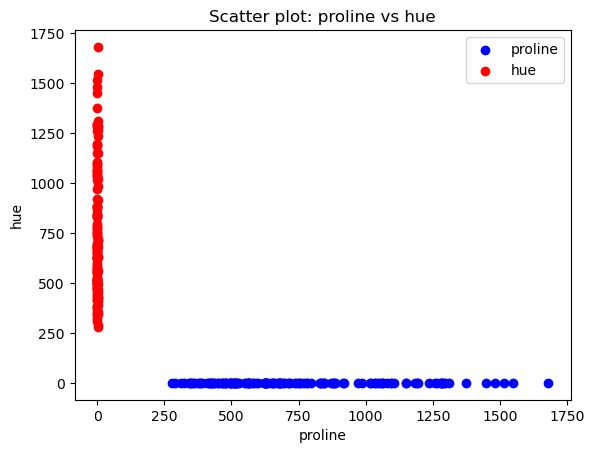

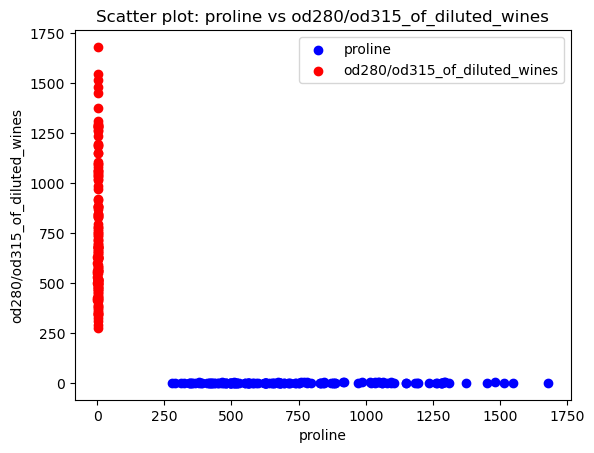

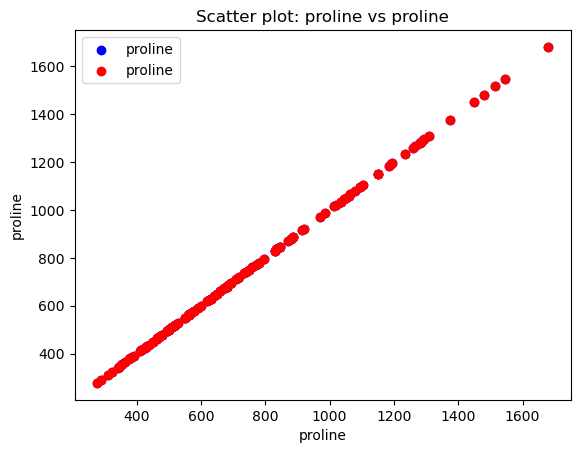

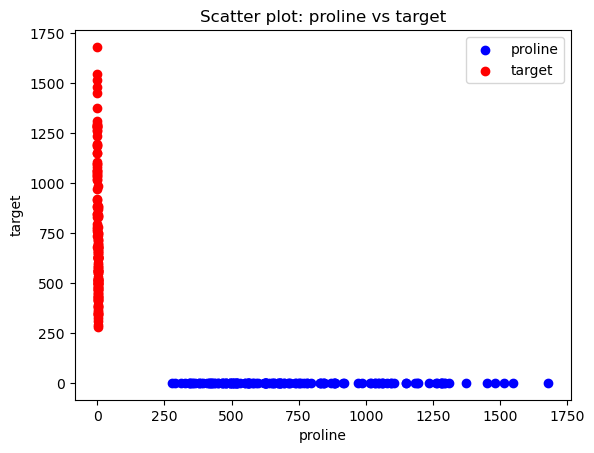

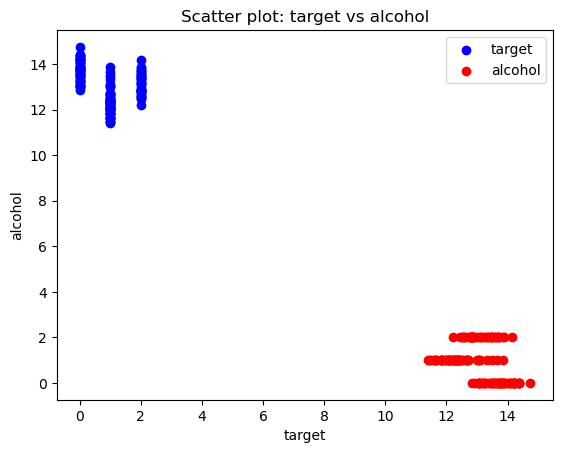

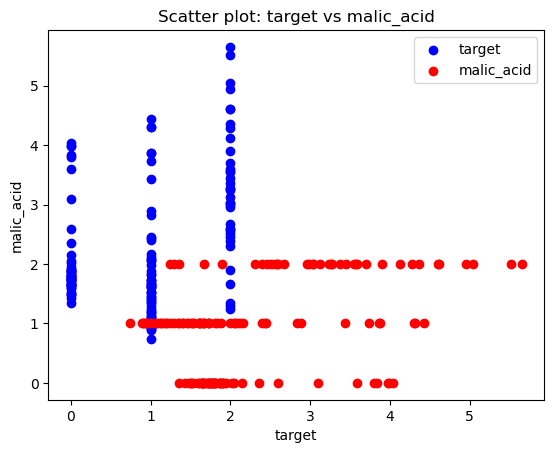

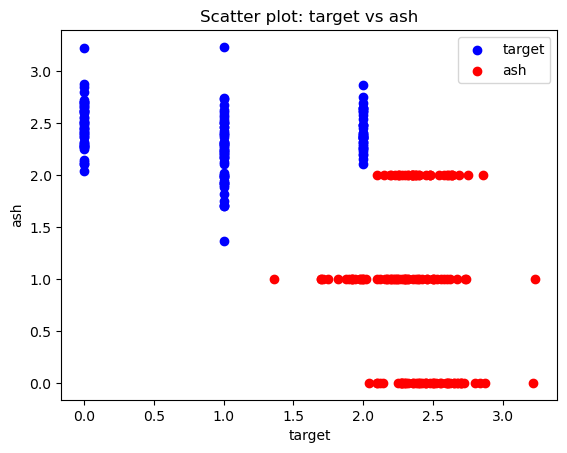

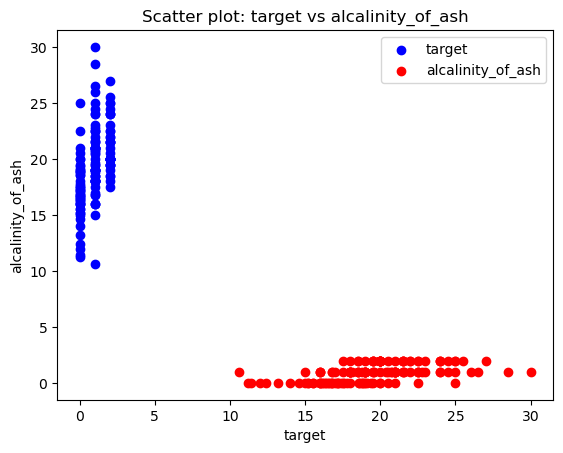

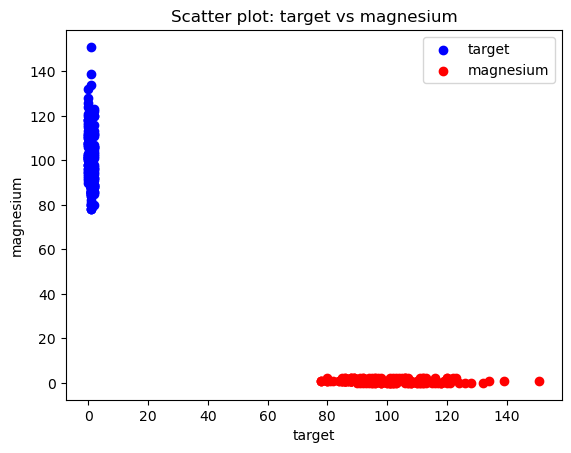

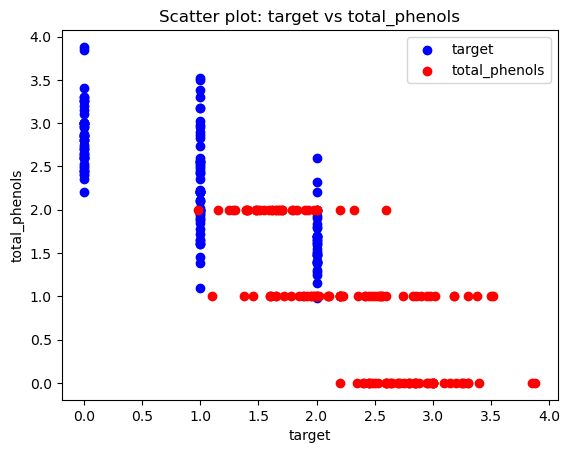

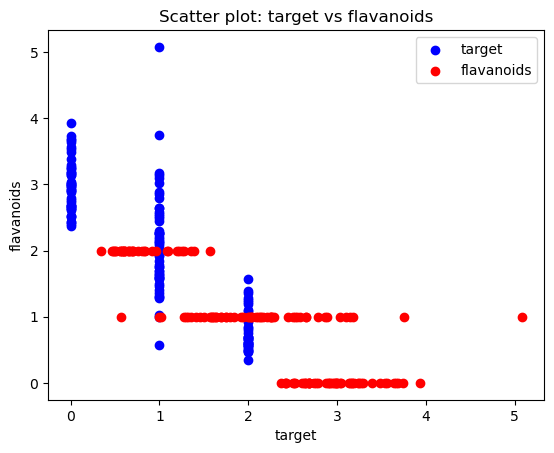

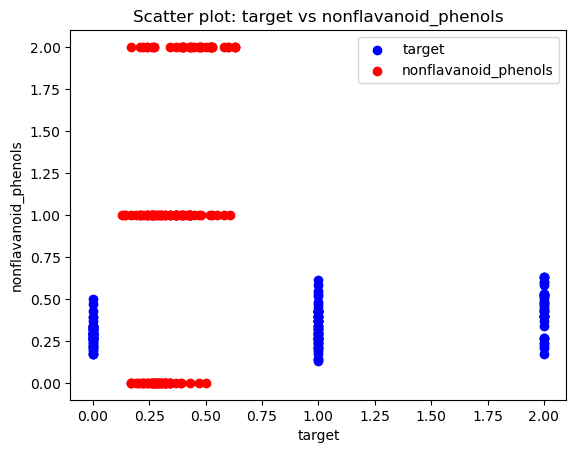

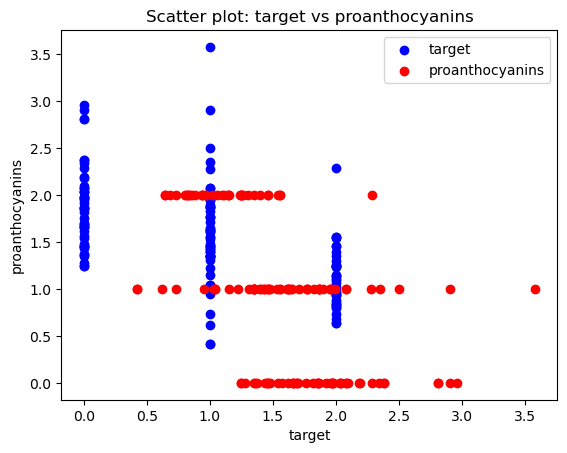

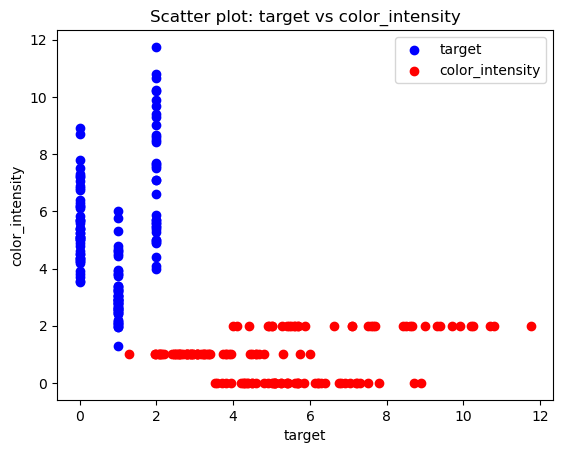

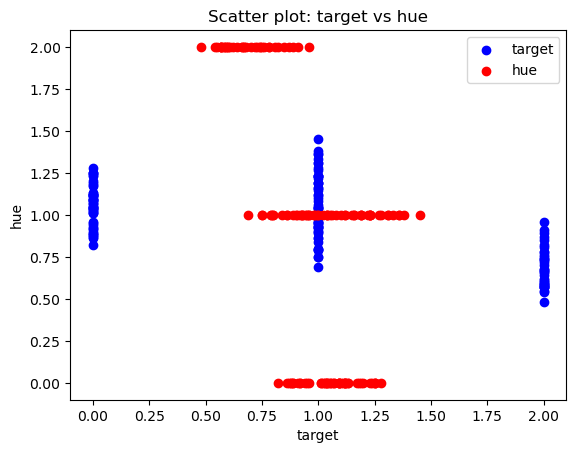

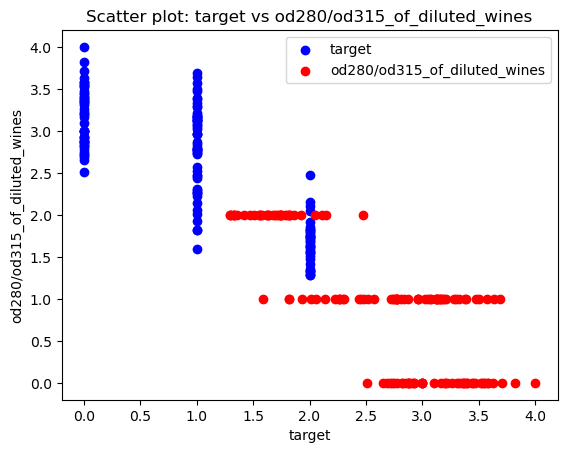

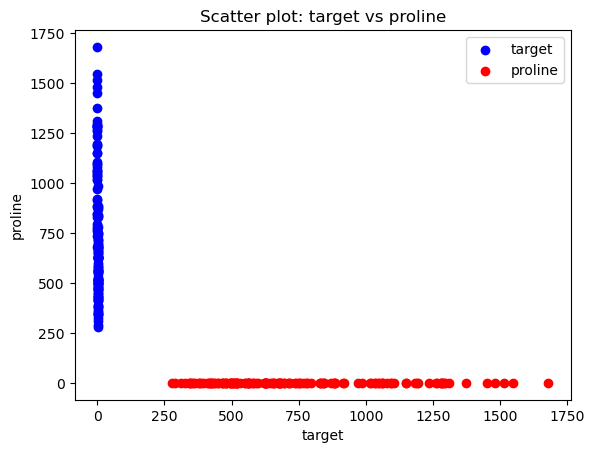

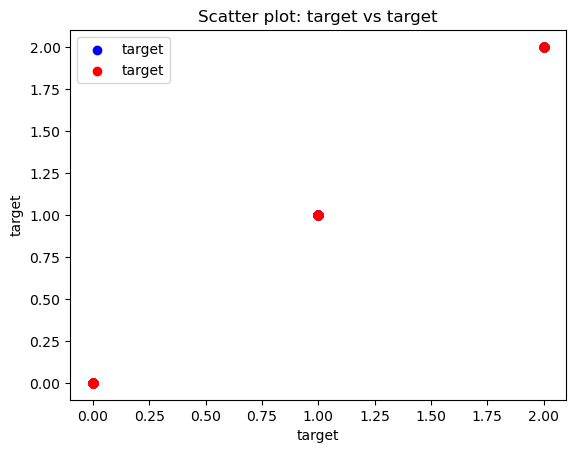

In [7]:
#First Product
corr_matrix = df_train.corr()

features = df_train.columns 
# Define two colors to be used for all plots 
colors = ['blue', 'red'] 
# Iterate through all pairs of features 
for i in range(len(features)): 
    for j in range(len(features)): 
        plt.figure() 
        # Plot scatter points for each feature pair using the two specified colors 
        plt.scatter(df_train[features[i]], df_train[features[j]], color=colors[0], label=features[i]) 
        plt.scatter(df_train[features[j]], df_train[features[i]], color=colors[1], label=features[j]) 
        # Set labels and title 
        plt.xlabel(features[i]) 
        plt.ylabel(features[j]) 
        plt.title(f'Scatter plot: {features[i]} vs {features[j]}') 
        plt.legend() 
        plt.show()
        

In [8]:
#Second Product

df_train.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  142.000000  142.000000  142.000000         142.000000  142.000000   
mean    12.997254    2.297746    2.361690          19.419718   99.943662   
std      0.789931    1.093317    0.283231           3.354815   13.683751   
min     11.410000    0.740000    1.360000          10.600000   78.000000   
25%     12.370000    1.592500    2.222500          17.250000   88.000000   
50%     13.050000    1.865000    2.360000          19.250000   98.000000   
75%     13.637500    3.020000    2.557500          21.375000  108.000000   
max     14.750000    5.650000    3.230000          30.000000  151.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     142.000000  142.000000            142.000000       142.000000   
mean        2.315986    2.063592              0.346690         1.561901   
std         0.639469    1.005302              0.117562         0.540979   
min         0.980000    0.340000              0.130000         0.420000   
25%         1.782500    1.257500              0.260000         1.250000   
50%         2.380000    2.155000              0.320000         1.505000   
75%         2.822500    2.887500              0.430000         1.870000   
max         3.880000    5.080000              0.630000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       142.000000  142.000000                    142.000000   142.000000   
mean          5.030211    0.958563                      2.638873   742.457746   
std           2.239593    0.219631                      0.718083   317.250905   
min           1.280000    0.480000                      1.290000   278.000000   
25%           3.180000    0.800000                      1.922500   500.000000   
50%           4.800000    0.960000                      2.815000   660.000000   
75%           6.182500    1.120000                      3.197500   957.500000   
max          11.750000    1.450000                      4.000000  1680.000000   

           target  
count  142.000000  
mean     0.922535  
std      0.772524  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [9]:
#Third Product

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    float64
 13  targe

Text(0, 0.5, 'Values')

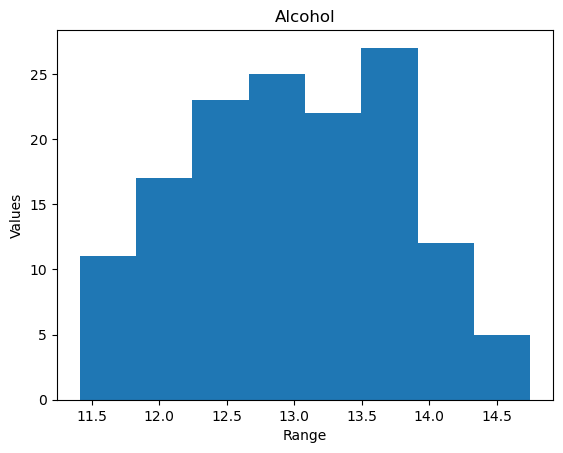

In [10]:
#Forth Product

df_train['alcohol'].plot(kind='hist', bins=8)
plt.title("Alcohol")
plt.xlabel("Range")
plt.ylabel("Values")

## Part 3 - Experiments
You could add as many code cells as needed

In [11]:
df_train.describe().loc["std"]

alcohol                           0.789931
malic_acid                        1.093317
ash                               0.283231
alcalinity_of_ash                 3.354815
magnesium                        13.683751
total_phenols                     0.639469
flavanoids                        1.005302
nonflavanoid_phenols              0.117562
proanthocyanins                   0.540979
color_intensity                   2.239593
hue                               0.219631
od280/od315_of_diluted_wines      0.718083
proline                         317.250905
target                            0.772524
Name: std, dtype: float64

In [12]:
#Cleaning DF

#החזרת עמודות בעלי סטיית תקן מינימלי
def getMinCol(df):
    #get column with variance close to 0
    min_col_name = df.describe().loc["std"].idxmin()
    return min_col_name



def drop_columns(df, min_col_name):
    #drop correlation and variance close to 0
    df.drop('total_phenols', axis='columns',inplace=True)
    df.drop('ash', axis='columns',inplace=True)
    df.drop(min_col_name, axis='columns',inplace=True)

    
min_col_name = getMinCol(df_train)
drop_columns(df_train,min_col_name)
drop_columns(df_test,min_col_name)


In [13]:
#Define models

#KNN model
knn_model = KNeighborsClassifier(algorithm='brute')  # Set algorithm to 'brute'

#SVM model (unchanged)
svm_model = SVC(random_state=42)

# Define the parameter grid for KNN including n_neighbors, metric, and weights
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11], # Number of neighbors
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], # Distance metrics
    'weights': ['uniform', 'distance'] # Weighting functions
}

# Define the parameter grid for SVM (unchanged)
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Separate original features and target

X_train = df_train.drop(columns='target')
y_train = df_train['target']
X_test = df_test.drop(columns='target')
y_test = df_test['target']



In [14]:
# Scaling the DS in values 0->1.
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#--------------------------------------------
scaler_S = StandardScaler()

X_train_S = scaler.fit_transform(X_train)
X_test_S = scaler.fit_transform(X_test)


In [15]:
#grid search with 5-fold cross-validation

#MinMax Scaler
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_params, cv=5, scoring='f1_macro')
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_params, cv=5, scoring='f1_macro')
#Standart Scaler
knn_grid_search_S = GridSearchCV(estimator=knn_model, param_grid=knn_params, cv=5, scoring='f1_macro')
svm_grid_search_S = GridSearchCV(estimator=svm_model, param_grid=svm_params, cv=5, scoring='f1_macro')

#-----------------------------------------------------------------
#MinMax version of DF
#Train the models
knn_grid_search.fit(X_train, y_train)
svm_grid_search.fit(X_train, y_train)

#Get best models and parameters
best_knn_model = knn_grid_search.best_estimator_
best_svm_model = svm_grid_search.best_estimator_

#Evaluate best models
knn_best_score = knn_grid_search.best_score_
svm_best_score = svm_grid_search.best_score_

#-----------------------------------------------------------------
#StandartScaled version DF
#Train models
knn_grid_search_S.fit(X_train_S, y_train)
svm_grid_search_S.fit(X_train_S, y_train)

#Get best models and parameters
best_knn_model_S = knn_grid_search_S.best_estimator_
best_svm_model_S = svm_grid_search_S.best_estimator_

#Evaluate best models
knn_best_score_S = knn_grid_search_S.best_score_
svm_best_score_S = svm_grid_search_S.best_score_

#-----------------------------------------------------------------
knn_results_MinMax = pd.DataFrame(knn_grid_search.cv_results_)
svm_results_MinMax = pd.DataFrame(svm_grid_search.cv_results_)

knn_results_S = pd.DataFrame(knn_grid_search_S.cv_results_)
svm_results_S = pd.DataFrame(svm_grid_search_S.cv_results_)

#-----------------------------------------------------------------

#Add a column to indicate if data was scaled
knn_results_MinMax['Scaling'] = 'MinMax'
svm_results_MinMax['Scaling'] = 'MinMax'
knn_results_S['Scaling'] = 'Standard_Scaled'
svm_results_S['Scaling'] = 'Standard_Scaled'

#Combine the results into one DataFrame for each model
knn_combined_results = pd.concat([knn_results_MinMax, knn_results_S], ignore_index=True)
svm_combined_results = pd.concat([svm_results_MinMax, svm_results_S], ignore_index=True)

#Select relevant columns for comparison
knn_combined_results = knn_combined_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score', 'Scaling']]
svm_combined_results = svm_combined_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score', 'Scaling']]

#Rename columns for better understanding
knn_combined_results.rename(columns={'mean_test_score': 'F1 Macro Score', 'std_test_score': 'F1 Score StdDev', 'rank_test_score': 'Rank'}, inplace=True)
svm_combined_results.rename(columns={'mean_test_score': 'F1 Macro Score', 'std_test_score': 'F1 Score StdDev', 'rank_test_score': 'Rank'}, inplace=True)

#Add a column to indicate the model
knn_combined_results['Model'] = 'KNN'
svm_combined_results['Model'] = 'SVM'

#Combine results for both models
all_results = pd.concat([knn_combined_results, svm_combined_results], ignore_index=True)

#Display DataFrame
all_results_sorted = all_results.sort_values(by=['Rank', 'Model']).reset_index(drop=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [16]:
#Results

styled_df = all_results_sorted.style.apply(highlight_first_row, axis=1)
styled_df

In [17]:
#Evaluate best model
knn_best_score = knn_grid_search.best_score_
svm_best_score = svm_grid_search.best_score_

print("Best KNN MinMax F1 Macro Score:", knn_best_score)
print("Best SVM MinMax F1 Macro Score:", svm_best_score)
print("Best KNN stdS F1 Macro Score:", knn_best_score_S)
print("Best SVM stdS F1 Macro Score:", svm_best_score_S)

#Create a DataFrame for comparison of results
results = {
    'Model': ['KNN MinMax','SVM MinMax','KNN StdS','SVM StdS'],
    'Best Parameters': [knn_grid_search.best_params_, svm_grid_search.best_params_,knn_grid_search_S.best_params_, svm_grid_search_S.best_params_],
    'Best F1 Macro Score': [knn_best_score, svm_best_score, knn_best_score, svm_best_score]
}

results_df = pd.DataFrame(results)
results_df

Best KNN MinMax F1 Macro Score: 0.9863203463203462
Best SVM MinMax F1 Macro Score: 0.979462242562929
Best KNN stdS F1 Macro Score: 0.9863203463203462
Best SVM stdS F1 Macro Score: 0.979462242562929


Model  \
0  KNN MinMax   
1  SVM MinMax   
2    KNN StdS   
3    SVM StdS   

                                                   Best Parameters  \
0  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}   
1                                     {'C': 1, 'kernel': 'linear'}   
2  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}   
3                                     {'C': 1, 'kernel': 'linear'}   

   Best F1 Macro Score  
0             0.986320  
1             0.979462  
2             0.986320  
3             0.979462

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [18]:
# Define KNN with the best hyperparameters

knn = KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='uniform')
f1_macro_scorer = make_scorer(f1_score, average='macro')


## Part 5 - Apply on test and show model performance estimation

In [19]:
# Perform cross-validation and calculate F1-macro score

cv_scores = cross_val_score(knn, X_train_S, y_train, cv=5, scoring=f1_macro_scorer)

# Train model and make the prediction
knn.fit(X_train_S, y_train)
y_pred = knn.predict(X_test_S)

# Calculate F1-macro on test set
f1_macro_test = f1_score(y_test, y_pred, average='macro')

print ("Implementing best algorithms and hyper params and scaling according to the train set, ")
print ("the pedictions to the test set are validated with F1-macro are:")
f1_macro_test

Implementing best algorithms and hyper params and scaling according to the train set, 
the pedictions to the test set are validated with F1-macro are:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.9177294685990338